# Capstone Project

## Project Title:  Automatic Ticket Assignment  -  Complete

- EDA
- Data Visualization
- Data Pre-Processing
- Model Building
- Model Training
- Model Evaluation
- Model Comparison


--------------------------------------------------------------------------

### Executed By : 
## NLP-1 | Group-2

--------------------------------------------------------------------------

## Project Guide: 
- Ms Vibha


## Team Members: 

- Bhagyashree Borkar
- M Nithin Sai Krishna
- Qazi Tasawur
- Mohansundari Ramalingam
- Sai Anusha Ramanandula

In [1]:
# Installing all dependencies:

# For plotly:

!pip install plotly
!pip install cufflinks
!pip install chart_studio

# For google translator:

#!pip3 uninstall googletrans
!pip3 install googletrans==3.1.0a0

# For ftfy(Mojibake detection):

!pip install ftfy

# For Language detection module:

!pip install langdetect

# For word cloud:

!pip install wordcloud 

# For BERT:

#!pip install huggingface-hub==0.0.8
#!pip install transformers==4.6
#!pip install tensorflow_datasets
#!pip install datasets
#!pip install datasets==1.11
#!pip install transformers==4.6.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=18fbb6a25a77612af3cc4b1fae00662fa10667c8723e6c9c8646620fec114812
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 1.4 MB 8.0 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
     |████████████████████████████

#### For G-Colab:

In [2]:
import tensorflow
physical_devices = tensorflow.config.list_physical_devices('GPU')
tensorflow.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [3]:
# All imports related to project:

import numpy as np
import pandas as pd
import plotly as py
import seaborn as sns
import cufflinks as cf
import plotly.offline
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import re, pickle, warnings, nltk, googletrans
from langdetect import detect
from wordcloud import WordCloud
from googletrans import Translator
from gensim.models import Word2Vec
from nltk import word_tokenize
from ftfy import fix_encoding, fix_text, badness

import tensorflow
from sklearn.decomposition import PCA
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras_preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Dense, Flatten, Input, LSTM, Embedding, Dropout, Activation, Bidirectional, SpatialDropout1D


#import transformers
#import datasets, huggingface_hub
#from datasets import load_metric, load_dataset
#from transformers import AutoTokenizer, TFTrainer, BertConfig
#from transformers import BertTokenizer,TFTrainingArguments, training_args
#from transformers import TFAutoModelForSequenceClassification, TFBertForSequenceClassification

import pickle, warnings, dill, os
from zipfile import ZipFile

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(color_codes = True)
nltk.download('stopwords')
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

------------------------------------------------------------------------

#### Depending on the type of platform, we have provided the necessary code for both Google Colab as well as Jupyter Notebook platforms.

#### **For G-Colab**

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
dataset_file_path = "/content/gdrive/MyDrive/Capstone_NLP/Input+Data+Synthetic+%28created+but+not+used+in+our+project%29.xlsx"
csv_dataset_file_path = "/content/gdrive/MyDrive/Capstone_NLP/Input+Data+Synthetic+%28created+but+not+used+in+our+project%29.csv"
#csv_dataset_file_path = project_folder_path + "input_data.csv"

#project_folder_path = "/content/gdrive/MyDrive/AIML/CapstoneProject/"
#dataset_file_path = project_folder_path + "Input+Data+Synthetic+%28created+but+not+used+in+our+project%29.xlsx"
#basic_model_file_path = project_folder_path + "model1.pkl"

In [6]:
project_folder_path = "/content/gdrive/MyDrive/Capstone_NLP/"
basic_model_file_path = project_folder_path + "model1.pkl"

In [7]:
ticket_data = pd.read_excel(dataset_file_path)

#### **For Jupyter**

In [8]:
# ticket_data = pd.read_excel('Input+Data+Synthetic+%28created+but+not+used+in+our+project%29.xlsx')

## **Data Visualisation and EDA:**

In [9]:
ticket_data.head(10)

Short description  \
0                                        login issue   
1                                            outlook   
2                                 cant log in to vpn   
3                      unable to access hr_tool page   
4                                       skype error    
5     unable to log in to engineering tool and skype   
6  event: critical:HostName_221.company.com the v...   
7  ticket_no1550391- employment status - new non-...   
8               unable to disable add ins on outlook   
9                    ticket update on inplant_874773   

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   
5     unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6  event: critical:HostName_221.company.com the v...  jyoqwxhz clhxsoqy   
7  ticket_no1550391- employment status - new non-...  eqzibjhw ymebpoih   
8               unable to disable add ins on outlook  mdbegvct dbvichlg   
9                    ticket update on inplant_874773  fumkcsji sarmtlhy   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0  
5            GRP_0  
6            GRP_1  
7            GRP_0  
8            GRP_0  
9            GRP_0

In [10]:
# Shape of dataset:

ticket_data.shape

(8500, 4)

In [11]:
# Dataset data types:

ticket_data.dtypes

Short description    object
Description          object
Caller               object
Assignment group     object
dtype: object

In [12]:
ticket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [13]:
# Columns of dataset:

ticket_data.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [14]:
# Describing the dataset:

ticket_data.describe(include="all")

Short description Description             Caller Assignment group
count               8492        8499               8500             8500
unique              7481        7817               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

In [15]:
# Missing data:

ticket_data.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [16]:
ticket_data[pd.isnull(ticket_data).any(axis=1)]

Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                            Description             Caller  \
2604  _x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...  ohdrnswl rezuibdt   
3383  _x000D_\n-connected to the user system using t...  qftpazns fxpnytmk   
3906  -user unable  tologin to vpn._x000D_\n-connect...  awpcmsey ctdiuqwe   
3910  -user unable  tologin to vpn._x000D_\n-connect...  rhwsmefo tvphyura   
3915  -user unable  tologin to vpn._x000D_\n-connect...  hxripljo efzounig   
3921  -user unable  tologin to vpn._x000D_\n-connect...  cziadygo veiosxby   
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...  wvqgbdhm fwchqjor   
4341  _x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...  eqmuniov ehxkcbgj   
4395                                                NaN  viyglzfo ajtfzpkb   

     Assignment group  
2604           GRP_34  
3383            GRP_0  
3906            GRP_0  
3910            GRP_0  
3915            GRP_0  
3921            GRP_0  
3924            GRP_0  
4341            GRP_0  
4395            GRP_0

In [17]:
# Replacing missing records with blanks:

ticket_data.fillna(str(), inplace=True)

In [18]:
ticket_data[pd.isnull(ticket_data).any(axis=1)]

Empty DataFrame
Columns: [Short description, Description, Caller, Assignment group]
Index: []

In [19]:
# Looking for duplicate data:

ticket_data[ticket_data.duplicated()]

Short description  \
51                           call for ecwtrjnq jpecxuty   
229                          call for ecwtrjnq jpecxuty   
493                     ticket update on inplant_872730   
512                                    blank call //gso   
667   job bkbackup_tool_powder_prod_full failed in j...   
...                                                 ...   
7836             probleme mit erpgui \tmqfjard qzhgdoua   
8051               issue on pricing in distributor_tool   
8093  reset passwords for prgthyuulla ramdntythanjes...   
8347                           blank call // loud noise   
8405                           unable to launch outlook   

                                            Description             Caller  \
51                           call for ecwtrjnq jpecxuty  olckhmvx pcqobjnd   
229                          call for ecwtrjnq jpecxuty  olckhmvx pcqobjnd   
493                     ticket update on inplant_872730  fumkcsji sarmtlhy   
512                                    blank call //gso  rbozivdq gmlhrtvp   
667   received from: monitoring_tool@company.com_x00...  bpctwhsn kzqsbmtp   
...                                                 ...                ...   
7836             probleme mit erpgui \tmqfjard qzhgdoua  tmqfjard qzhgdoua   
8051  we have agreed price with many of the distribu...  hbmwlprq ilfvyodx   
8093                                                the  boirqctx bkijgqry   
8347                           blank call // loud noise  rbozivdq gmlhrtvp   
8405                           unable to launch outlook  wjtzrmqc ikqpbflg   

     Assignment group  
51              GRP_0  
229             GRP_0  
493             GRP_0  
512             GRP_0  
667             GRP_8  
...               ...  
7836           GRP_24  
8051           GRP_21  
8093           GRP_17  
8347            GRP_0  
8405            GRP_0  

[83 rows x 4 columns]

In [20]:
# Duplicate Data:

print("Duplicate Data - ", ticket_data.duplicated().sum())

# Removing duplicate data:

print("Before removing duplicate data - ", ticket_data.shape)
ticket_data.drop_duplicates(inplace=True, keep='first')
ticket_data.reset_index(drop=True, inplace=True)

# Shape of dataset after removing duplicate data:

print("After removing duplicate data - ", ticket_data.shape)

Duplicate Data -  83
Before removing duplicate data -  (8500, 4)
After removing duplicate data -  (8417, 4)


### **Observations:**

-  We are dealing with 4 columns i.e Short Description, Description and Caller clearly as independent variables and Assignment Group as our target variable.

-  All our columns are of 'object' datatype.

-  There are discrepancies w.r.t value counts which indicates that there are missing values primarily in 'Description' and 'Short Description' columns.

-  There are 83 duplicate datapoints in our dataset.

-   After necessary removal, our final shape of the dataset is 8417 rows and 4 columns.

----------------------------------------------------------------------------------------

### **Data Visualization using Plotly**

In [21]:
t_data1 = ticket_data.copy()

In [22]:
t_data1.insert(1, 'sd_len', t_data1['Short description'].astype(str).apply(len))
t_data1.insert(2, 'sd_word_count', t_data1['Short description'].apply(lambda x: len(str(x).split())))
t_data1.insert(4, 'desc_len', t_data1['Description'].astype(str).apply(len))
t_data1.insert(5, 'desc_word_count', t_data1['Description'].apply(lambda x: len(str(x).split())))

In [23]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [24]:
# Histogram showing distribution of assignment groups:

configure_plotly_browser_state()

t_data1['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    title='Assignment Group Distribution')

In [25]:
# Piechart showing distribution of assignment groups:

configure_plotly_browser_state()

assgn_grp = pd.DataFrame(t_data1.groupby('Assignment group').size(),columns = ['Count']).reset_index()
assgn_grp.iplot(
    kind='pie', 
    labels='Assignment group', 
    values='Count', 
    title='Assignment Group Distribution')
plt.show()

In [26]:
# Histogram for Assignment Groups with less than equal to 30 tickets assigned:

configure_plotly_browser_state()

rare_ticket = ticket_data.groupby(['Assignment group']).filter(lambda x: len(x) <= 30)
print('Groups with less than equal to 30 tickets assigned:', rare_ticket['Assignment group'].nunique())

rare_ticket['Assignment group'].iplot(
    kind='hist',
    xTitle='Assignment Group',
    yTitle='count',
    colorscale='-orrd',
    title='#Records by rare Assignment Groups')

Groups with less than equal to 30 tickets assigned: 40


In [27]:
# Distribution of Assignment groups excluding GRP_0 & rare groups (groups with less than equal 30 tickets assigned):

excluded_grp = ['GRP_0']
excluded_grp.extend(rare_ticket['Assignment group'].unique())
filtered_tkt = t_data1[~t_data1['Assignment group'].isin(excluded_grp)]

In [28]:
# Pie chart after excluding GRP_0 AND Rare groups:

configure_plotly_browser_state()

filtered_assgn_grp = pd.DataFrame(filtered_tkt.groupby('Assignment group').size(),columns = ['Count']).reset_index()
filtered_assgn_grp.iplot(
    kind='pie', 
    labels='Assignment group', 
    values='Count', 
    title='#Records by Assignment groups(excluding GRP_0 and rare groups)',
    pull=np.linspace(0,0.2,filtered_assgn_grp['Assignment group'].nunique()))

In [29]:
# Pie chart after excluding GRP_0 AND Rare groups:

configure_plotly_browser_state()

filtered_tkt['Assignment group'].iplot(
    kind='histogram',
    xTitle='Assignment Group',
    yTitle='count',
    colorscale='-gnbu',
    title='#Records by Assignment groups(excluding GRP_0 and rare groups)')

In [30]:
# Piechart for Top 10 callers in terms of frequency of raising tickets in the entire dataset:

configure_plotly_browser_state()

print('Total caller count:', t_data1['Caller'].nunique())
t_data2 = pd.DataFrame(t_data1.groupby(['Caller']).size().nlargest(10), columns=['Count']).reset_index()
t_data2.iplot(kind='pie',
         labels='Caller', 
         values='Count', 
         title='Top 10 callers',
         colorscale='-rdbu',
         pull=[0,0,0,0,0.05,0.1,0.15,0.2,0.25,0.3])

Total caller count: 2950


In [31]:
# Histogram for Short desc word count:

configure_plotly_browser_state()

t_data1['sd_word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    colorscale='-bupu',
    title='Short desc. Word Count Distribution')

In [32]:
configure_plotly_browser_state()

# Frequency of Description text length:

t_data1['desc_len'].iplot(
    kind='bar',
    xTitle='text length',
    yTitle='count',
    colorscale='-ylgn',
    title='Description Text Length Distribution')

configure_plotly_browser_state()

# Histogram for Description word count:

t_data1['desc_word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    colorscale='-bupu',
    title='Description Word Count Distribution')

In [33]:
# Unique values in the dataset:

print("Total rows in dataset -> ", ticket_data.shape[0])
for col in ticket_data.columns.values:
    print("Unique value count in column-%s is %s"%(col, len(ticket_data[col].value_counts())))

Total rows in dataset ->  8417
Unique value count in column-Short description is 7482
Unique value count in column-Description is 7818
Unique value count in column-Caller is 2950
Unique value count in column-Assignment group is 74


### **Observations:**

-  Almost half of the total records belong to 'GRP-0', which indicates a large number of issues belonging to a single category.

-  There are about 40 groups with less than 30 tickets, indicating that these groups usually represent rare tickets.

-  Excluding the rare tickets groups and 'GRP_0', there are about 33 groups with more than 30 tickets among which, GRP_8 is the biggest with 645 tickets and 'GRP_22' & 'GRP_31' the smallest with 31 tickets each.

-  Among callers, more than 50% of the calls(788) originate from a single caller named 'bpctwhsn kzqsbmtp'.

-  Majority of 'Short Description' word count in under 10 words.

-  Majority of 'Description' word count is under 200 words.

-  Unique value counts in 'Short description' is 7482.

-  Unique value counts in 'Description' is 7818.

-  Unique value counts in 'Caller' is 2950.

-  Unique value counts in 'Assignment Group' is 74.

----------------------------------------------------------------------------------------

## Detailed EDA:

In [34]:
ticket_data.head(10)

Short description  \
0                                        login issue   
1                                            outlook   
2                                 cant log in to vpn   
3                      unable to access hr_tool page   
4                                       skype error    
5     unable to log in to engineering tool and skype   
6  event: critical:HostName_221.company.com the v...   
7  ticket_no1550391- employment status - new non-...   
8               unable to disable add ins on outlook   
9                    ticket update on inplant_874773   

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   
5     unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6  event: critical:HostName_221.company.com the v...  jyoqwxhz clhxsoqy   
7  ticket_no1550391- employment status - new non-...  eqzibjhw ymebpoih   
8               unable to disable add ins on outlook  mdbegvct dbvichlg   
9                    ticket update on inplant_874773  fumkcsji sarmtlhy   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0  
5            GRP_0  
6            GRP_1  
7            GRP_0  
8            GRP_0  
9            GRP_0

In [35]:
# Value for Short description and Description features:

counter = 0

# ticket_text = ""

ticket_text = []
for i in range(0, ticket_data.shape[0]):
    if ticket_data["Short description"][i] == ticket_data["Description"][i]:
        counter = counter + 1
    if ticket_data["Short description"][i] not in ticket_text:
        ticket_text.append(ticket_data["Short description"][i])
print("No. of records has same value for Short description and Description features - ", counter)
print("Count of unique Short description and Description - ", len(ticket_text))
print(counter - len(ticket_text))
print(ticket_text)

No. of records has same value for Short description and Description features -  2818
Count of unique Short description and Description -  7482
-4664
['login issue', 'outlook', 'cant log in to vpn', 'unable to access hr_tool page', 'skype error ', 'unable to log in to engineering tool and skype', 'event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/ ', "ticket_no1550391- employment status - new non-employee [enter user's name]", 'unable to disable add ins on outlook', 'ticket update on inplant_874773', 'engineering tool says not connected and unable to submit reports', 'hr_tool site not loading page correctly', 'unable to login to hr_tool to sgxqsuojr xwbesorf cards', 'user wants to reset the password', 'unable to open payslips ', 'ticket update on inplant_874743', 'unable to login to company vpn', 'when undocking pc , screen will not come back', 'erp SID_34 account locked', 'unable to sign into vpn', 'unable to check payslips', 'vpn i

In [36]:
# nunique() -> returns the number of unique values for each column
# nunique() -> searches column-wise and returns the number of unique values for each row

print("Variation in Group feature in Ticket Dataset - \n")
ticket_data.groupby('Assignment group').nunique()

Variation in Group feature in Ticket Dataset - 



Short description  Description  Caller
Assignment group                                        
GRP_0                          3202         3410    2040
GRP_1                            31           31      15
GRP_10                          138          140      57
GRP_11                           30           30      22
GRP_12                          252          256     139
...                             ...          ...     ...
GRP_71                            2            2       1
GRP_72                            2            2       2
GRP_73                            1            1       1
GRP_8                           634          645      21
GRP_9                           237          252      57

[74 rows x 3 columns]

In [37]:
# Group-By Group -> Count no. of callers:

ticket_data_caller_count = ticket_data.groupby('Assignment group').agg({'Caller' : 'count'}).reset_index()
ticket_data_caller_count_sort = ticket_data_caller_count.sort_values(['Caller', 'Assignment group'], ascending = [0, 1])
ticket_data_caller_count_sort.rename(columns = {'Assignment group': 'Group', 'Caller': 'Count_of_Caller'},inplace=True)
ticket_data_caller_count_sort

Group  Count_of_Caller
0    GRP_0             3934
72   GRP_8              645
17  GRP_24              285
4   GRP_12              257
73   GRP_9              252
..     ...              ...
58  GRP_61                1
61  GRP_64                1
64  GRP_67                1
68  GRP_70                1
71  GRP_73                1

[74 rows x 2 columns]

In [38]:
# Top 20 groups with maximum no. of callers:

ticket_data_caller_count_sort.head(20).reset_index()

index   Group  Count_of_Caller
0       0   GRP_0             3934
1      72   GRP_8              645
2      17  GRP_24              285
3       4  GRP_12              257
4      73   GRP_9              252
5      12   GRP_2              241
6      11  GRP_19              215
7      23   GRP_3              200
8      56   GRP_6              183
9       5  GRP_13              145
10      2  GRP_10              140
11     45   GRP_5              128
12      6  GRP_14              118
13     18  GRP_25              116
14     27  GRP_33              107
15     34   GRP_4              100
16     22  GRP_29               97
17     10  GRP_18               88
18      8  GRP_16               85
19     25  GRP_31               69

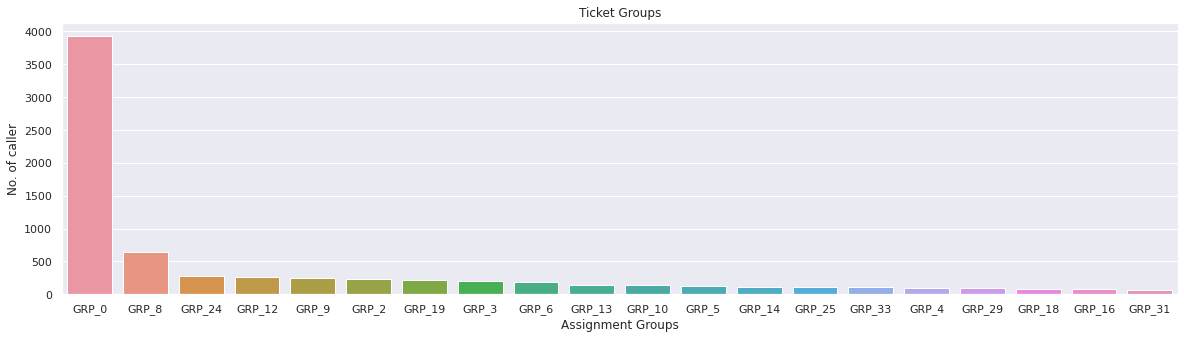

In [39]:
# Top 20 groups with maximum no. of caller:

sns.set(rc = {'figure.figsize' : (20, 5)})
sns.barplot(ticket_data_caller_count_sort["Group"].head(20), ticket_data_caller_count_sort["Count_of_Caller"].head(20));
plt.title("Ticket Groups")
plt.xlabel("Assignment Groups")
plt.ylabel("No. of caller")
plt.show()

In [40]:
# Group-By Group -> Count no. of Short description:

ticket_data_shortD_count = ticket_data.groupby('Assignment group').agg({'Short description' : 'count'}).reset_index()
ticket_data_shortD_count_sort = ticket_data_shortD_count.sort_values(['Short description', 'Assignment group'], ascending = [0, 1])
ticket_data_shortD_count_sort.rename(columns = {'Assignment group': 'Group', 'Short description': 'Count_of_Short_Desc'}, inplace=True)
ticket_data_shortD_count_sort

Group  Count_of_Short_Desc
0    GRP_0                 3934
72   GRP_8                  645
17  GRP_24                  285
4   GRP_12                  257
73   GRP_9                  252
..     ...                  ...
58  GRP_61                    1
61  GRP_64                    1
64  GRP_67                    1
68  GRP_70                    1
71  GRP_73                    1

[74 rows x 2 columns]

In [41]:
# Top 20 groups with maximum no. of Short description:

ticket_data_shortD_count_sort.head(20).reset_index()

index   Group  Count_of_Short_Desc
0       0   GRP_0                 3934
1      72   GRP_8                  645
2      17  GRP_24                  285
3       4  GRP_12                  257
4      73   GRP_9                  252
5      12   GRP_2                  241
6      11  GRP_19                  215
7      23   GRP_3                  200
8      56   GRP_6                  183
9       5  GRP_13                  145
10      2  GRP_10                  140
11     45   GRP_5                  128
12      6  GRP_14                  118
13     18  GRP_25                  116
14     27  GRP_33                  107
15     34   GRP_4                  100
16     22  GRP_29                   97
17     10  GRP_18                   88
18      8  GRP_16                   85
19     25  GRP_31                   69

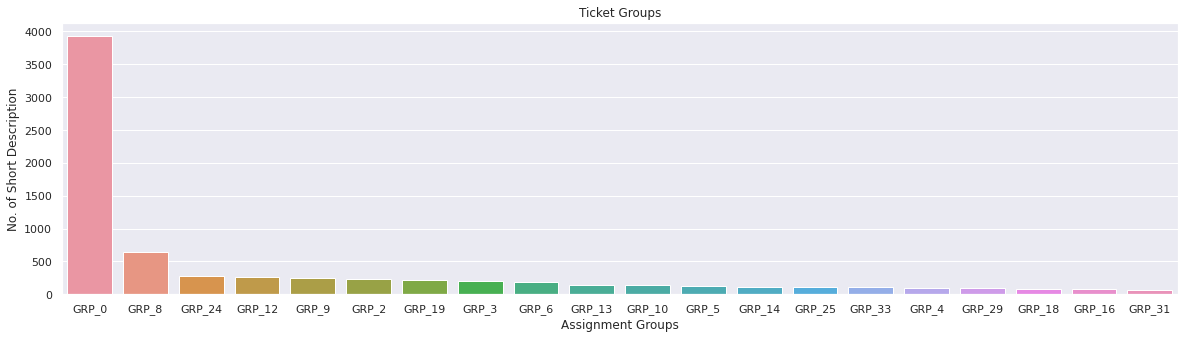

In [42]:
# Top 20 - Group - Short Description:
# Top 20 groups with maximum no. of Short description:

sns.set(rc = {'figure.figsize' : (20, 5)})
sns.barplot(ticket_data_shortD_count_sort["Group"].head(20), ticket_data_shortD_count_sort["Count_of_Short_Desc"].head(20));
plt.title("Ticket Groups")
plt.xlabel("Assignment Groups")
plt.ylabel("No. of Short Description")
plt.show()

**Maximum tickets belong to Group 0 then Group 8.**

In [43]:
# Group-By Caller -> Top 10 Callers with maximum no. of groups:

ticket_data_caller_group_count = ticket_data.groupby('Caller').agg({'Assignment group' : 'count'}).reset_index()
ticket_data_caller_group_count_sort = ticket_data_caller_group_count.sort_values(['Assignment group', 'Assignment group'], ascending = [0, 1])
ticket_data_caller_group_count_sort.rename(columns = {'Caller': 'Caller', 'Assignment group': 'Count_of_Group'},inplace=True)
print("Top 10 Caller with maximum no. of group - ")
ticket_data_caller_group_count_sort.head(10)

Top 10 Caller with maximum no. of group - 


Caller  Count_of_Group
182   bpctwhsn kzqsbmtp             788
2     ZkBogxib QsEJzdZO             151
646   fumkcsji sarmtlhy             128
1902  rbozivdq gmlhrtvp              72
1945  rkupnshb gsmzfojw              71
1044  jloygrwh acvztedi              64
2087  spxqmiry zpwgoqju              63
1587  oldrctiu bxurpsyi              57
386   dkmcfreg anwmfvlg              51
1098  jyoqwxhz clhxsoqy              51

In [44]:
# Group-By Caller -> Top 10 Description with maximum no. of desc:

ticket_data_caller_desc_count = ticket_data.groupby('Caller').agg({'Description' : 'count'}).reset_index()
ticket_data_caller_desc_count_sort = ticket_data_caller_desc_count.sort_values(['Description', 'Description'], ascending = [0, 1])
ticket_data_caller_desc_count_sort.rename(columns = {'Caller': 'Caller', 'Description': 'Count_of_Description'},inplace=True)
print("Top 10 Caller with maximum no. of description - ")
ticket_data_caller_desc_count_sort.head(10)

Top 10 Caller with maximum no. of description - 


Caller  Count_of_Description
182   bpctwhsn kzqsbmtp                   788
2     ZkBogxib QsEJzdZO                   151
646   fumkcsji sarmtlhy                   128
1902  rbozivdq gmlhrtvp                    72
1945  rkupnshb gsmzfojw                    71
1044  jloygrwh acvztedi                    64
2087  spxqmiry zpwgoqju                    63
1587  oldrctiu bxurpsyi                    57
386   dkmcfreg anwmfvlg                    51
1098  jyoqwxhz clhxsoqy                    51

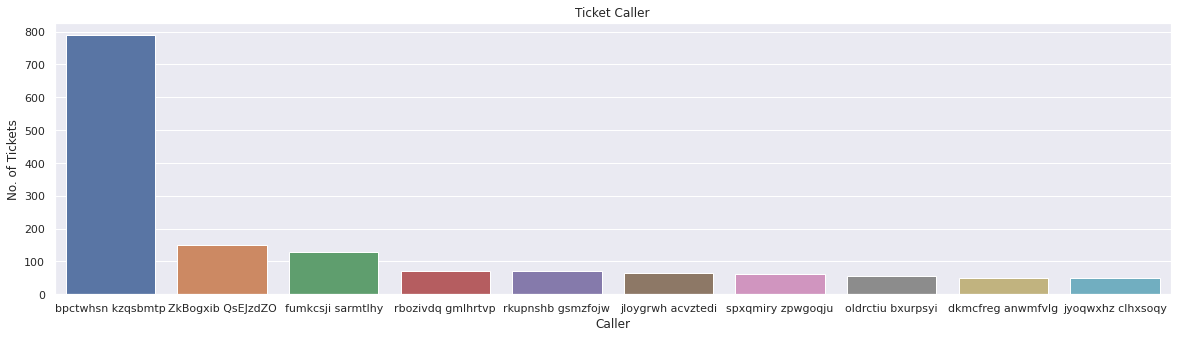

In [45]:
# Barplot for callers:
# Top 10 - Caller - Short Description:
# Top 10 Callers with maximum no. of tickets:

sns.set(rc = {'figure.figsize' : (20, 5)})
sns.barplot(ticket_data_caller_desc_count_sort["Caller"].head(10), ticket_data_caller_desc_count_sort["Count_of_Description"].head(10));
plt.title("Ticket Caller")
plt.xlabel("Caller")
plt.ylabel("No. of Tickets")
plt.show()

0
159


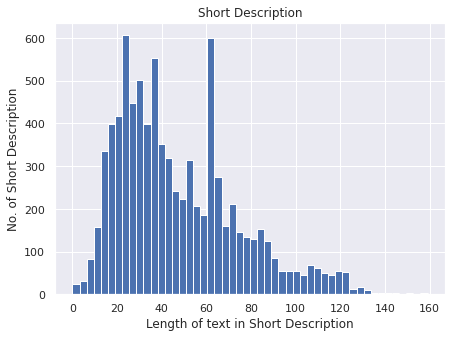

In [46]:
# Histogram for Short Description Text Length:

sns.set(rc = {'figure.figsize' : (7, 5)})
ticket_data["Short description"].str.len().hist(bins = 50)
print(min(ticket_data["Short description"].str.len()))
print(max(ticket_data["Short description"].str.len()))
plt.title("Short Description")
plt.xlabel("Length of text in Short Description")
plt.ylabel("No. of Short Description")
plt.show()

0
14441


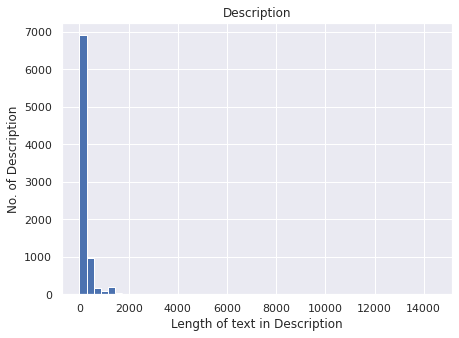

In [47]:
# Histogram for Description Text Length:

sns.set(rc = {'figure.figsize' : (7, 5)})
ticket_data["Description"].str.len().hist(bins = 50)
print(min(ticket_data["Description"].str.len()))
print(max(ticket_data["Description"].str.len()))
plt.title("Description")
plt.xlabel("Length of text in Description")
plt.ylabel("No. of Description")
plt.show()

### **Observations:**

-  There are a total of 74 unique Assignment Groups.

-  2818 records have same text/value for 'Short description' and 'Description' features.

-  Excluding the rare tickets groups and 'GRP_0', there are about 33 groups with more than 30 tickets among which, GRP_8 is the biggest with 645 tickets and 'GRP_22' & 'GRP_31' the smallest with 31 tickets each.

-  Among callers, more than 50% of the calls(788) originate from a single caller named 'bpctwhsn kzqsbmtp'.

-  Majority of 'Short Description' word count in under 10 words.

-  Majority of 'Description' word count is under 200 words.

-  Majority of 'Short Description' Text length is under 80.

-  Majority of 'Description' Text length is under 500.

-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------

## Pre-processing:

In [48]:
# Merging Short description and description with space in existing dataframe:

ticket_data['Text'] = ticket_data['Short description'] + ' ' + ticket_data['Description']

# Looking for Null values in Text new columns:

ticket_data[ticket_data['Text'].isnull()]

Empty DataFrame
Columns: [Short description, Description, Caller, Assignment group, Text]
Index: []

In [49]:
# Function to detect Mojibakes:

def mojibakes(text):
    if not badness.sequence_weirdness(text):
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        return True
    else:
        return False
    
# Examining the dataset for mojibakes:

ticket_data[ticket_data.iloc[:,:-1].applymap(mojibakes).all(1)]

# Sanitizing the dataset from Mojibakes:

ticket_data['Short description'] = ticket_data['Short description'].apply(fix_text)
ticket_data['Description'] = ticket_data['Description'].apply(fix_text)
ticket_data['Text'] = ticket_data['Text'].apply(fix_text)

In [50]:
# Detecting the language for all input texts:

lang_list = []
for i in range(0, ticket_data.shape[0]):
    try:
        if (ticket_data["Text"][i].strip() != ""):
            lang = detect(ticket_data["Text"][i])
            lang_list.append(lang)
    except:
        continue
        
print("Detected language of input text - ", set(lang_list))

Detected language of input text -  {'nl', 'sl', 'af', 'fi', 'so', 'pl', 'lv', 'vi', 'sv', 'en', 'sk', 'et', 'id', 'it', 'de', 'ro', 'tl', 'cy', 'tr', 'sq', 'pt', 'es', 'hr', 'da', 'ko', 'fr', 'zh-cn', 'lt', 'hu', 'ca', 'no'}


In [51]:
ticket_data['Text_Lang'] = ticket_data['Text'].apply(lambda x: detect(x))

In [52]:
ticket_data['Translated_Text'] = ""
ticket_data

Short description  \
0                                           login issue   
1                                               outlook   
2                                    cant log in to vpn   
3                         unable to access hr_tool page   
4                                          skype error    
...                                                 ...   
8412                  emails not coming in from zz mail   
8413                           telephony_software issue   
8414  vip2: windows password reset for tifpdchb pedx...   
8415                       machine não está funcionando   
8416  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
0     -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1     _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2     _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                         unable to access hr_tool page  xbkucsvz gcpydteq   
4                                          skype error   owlgqjme qhcozdfx   
...                                                 ...                ...   
8412  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...  avglmrts vhqmtiua   
8413                           telephony_software issue  rbozivdq gmlhrtvp   
8414  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8415  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8416  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group                                               Text  \
0               GRP_0  login issue -verified user details.(employee# ...   
1               GRP_0  outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2               GRP_0  cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3               GRP_0  unable to access hr_tool page unable to access...   
4               GRP_0                          skype error  skype error    
...               ...                                                ...   
8412           GRP_29  emails not coming in from zz mail _x000D_\n_x0...   
8413            GRP_0  telephony_software issue telephony_software issue   
8414            GRP_0  vip2: windows password reset for tifpdchb pedx...   
8415           GRP_62  machine não está funcionando i am unable to ac...   
8416           GRP_49  an mehreren pc`s lassen sich verschiedene prgr...   

     Text_Lang Translated_Text  
0           en                  
1           en                  
2           en                  
3           en                  
4           no                  
...        ...             ...  
8412        en                  
8413        en                  
8414        en                  
8415        en                  
8416        de                  

[8417 rows x 7 columns]

In [53]:
# Translating Non-English textual data to English:

translator = Translator()

for i in range(0, ticket_data.shape[0]):
    text_lang = ticket_data["Text_Lang"][i]
    ticket_text = ticket_data["Text"][i]
    if text_lang != "en":
        ticket_data['Translated_Text'][i] = translator.translate(ticket_text, dest='en', src=text_lang).text
    else:
        ticket_data['Translated_Text'][i] = ticket_text

In [54]:
# Examining the language of translated text:

ticket_data['Text_Lang_New'] = ticket_data['Translated_Text'].apply(lambda x: detect(x))

In [55]:
ticket_data = ticket_data[ticket_data['Text_Lang_New'] == 'en']
ticket_data.reset_index(inplace=True, drop = True)
ticket_data

Short description  \
0                                           login issue   
1                                               outlook   
2                                    cant log in to vpn   
3                         unable to access hr_tool page   
4        unable to log in to engineering tool and skype   
...                                                 ...   
7512                  emails not coming in from zz mail   
7513                           telephony_software issue   
7514  vip2: windows password reset for tifpdchb pedx...   
7515                       machine não está funcionando   
7516  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
0     -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1     _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2     _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                         unable to access hr_tool page  xbkucsvz gcpydteq   
4        unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
...                                                 ...                ...   
7512  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...  avglmrts vhqmtiua   
7513                           telephony_software issue  rbozivdq gmlhrtvp   
7514  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
7515  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
7516  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group                                               Text  \
0               GRP_0  login issue -verified user details.(employee# ...   
1               GRP_0  outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2               GRP_0  cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3               GRP_0  unable to access hr_tool page unable to access...   
4               GRP_0  unable to log in to engineering tool and skype...   
...               ...                                                ...   
7512           GRP_29  emails not coming in from zz mail _x000D_\n_x0...   
7513            GRP_0  telephony_software issue telephony_software issue   
7514            GRP_0  vip2: windows password reset for tifpdchb pedx...   
7515           GRP_62  machine não está funcionando i am unable to ac...   
7516           GRP_49  an mehreren pc`s lassen sich verschiedene prgr...   

     Text_Lang                                    Translated_Text  \
0           en  login issue -verified user details.(employee# ...   
1           en  outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2           en  cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3           en  unable to access hr_tool page unable to access...   
4           en  unable to log in to engineering tool and skype...   
...        ...                                                ...   
7512        en  emails not coming in from zz mail _x000D_\n_x0...   
7513        en  telephony_software issue telephony_software issue   
7514        en  vip2: windows password reset for tifpdchb pedx...   
7515        en  machine não está funcionando i am unable to ac...   
7516        de  different programs cannot be opened on several...   

     Text_Lang_New  
0               en  
1               en  
2               en  
3               en  
4               en  
...            ...  
7512            en  
7513            en  
7514            en  
7515            en  
7516            en  

[7517 rows x 8 columns]

In [56]:
set(ticket_data['Text_Lang_New'])

{'en'}

In [57]:
# Detecting language for all input texts:

lang_list2 = []
for i in range(0, ticket_data.shape[0]):
    try:
        if (ticket_data["Translated_Text"][i].strip() != ""):
            lang = detect(ticket_data["Translated_Text"][i])
            lang_list2.append(lang)
    except:
        continue
        
print("Detected language of input text - ", set(lang_list2))

Detected language of input text -  {'nl', 'af', 'so', 'pl', 'sv', 'en', 'et', 'it', 'ro', 'de', 'tl', 'cy', 'pt', 'es', 'da', 'cs', 'fr', 'ca', 'no'}


In [58]:
# Selecting only alphabets:

ticket_data["Translated_Text"] = ticket_data["Translated_Text"].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))

# Making all textual data lowercase:

ticket_data["Translated_Text"] = ticket_data["Translated_Text"].apply(lambda x: x.lower())

# Removing all extra white spaces:

ticket_data["Translated_Text"] = ticket_data["Translated_Text"].apply(lambda x: x.strip())

# Printing text for a random record:

ticket_data["Translated_Text"][10]

'hr tool site not loading page correctly hr tool site not loading page correctly'

In [59]:
ticket_data['Translated_Text']

0       login issue verified user details employee man...
1       outlook x000d x000d received from hmjdrvpb kom...
2       cant log in to vpn x000d x000d received from e...
3       unable to access hr tool page unable to access...
4       unable to log in to engineering tool and skype...
                              ...                        
7512    emails not coming in from zz mail x000d x000d ...
7513    telephony software issue telephony software issue
7514    vip2 windows password reset for tifpdchb pedxr...
7515    machine n o est funcionando i am unable to acc...
7516    different programs cannot be opened on several...
Name: Translated_Text, Length: 7517, dtype: object

In [60]:
ticket_data[ticket_data['Text_Lang']=='no']

Short description  \
350                password reset for yscgjexz hxlbvjgf   
1474                    laptop byclpwmv esafrtbh defekt   
1619  无法创建skype会议,outlook 日历上面没有 skype online meetin...   
2506  telefon mit der nummer 1038091558 ist defekt. ...   
3196    mikrofon vom mobiltelefon gigaset sl 3 defekt!    
3343                             password reset for mii   
3711              unable to get audio on skype meeting    
3801                     password reset alert from o365   
4434   barcode scanner defekt \paternoster \bur am orde   
4490                                     konto resetten   
6166                     password reset alert from o365   
6219                         unable to log in to skype    
6425                     meeting inivation no skype 加载项   
6461                                         skype会议时不去   
6604                                    sipppr for help   
7290  telefon hörer am apparat fertigung halle c defekt   

                                            Description             Caller  \
350                password reset for yscgjexz hxlbvjgf  yscgjexz hxlbvjgf   
1474                    laptop byclpwmv esafrtbh defekt  sxabotdw xlozwcyk   
1619  无法创建skype会议,outlook 日历上面没有 skype online meetin...  dqovxreg qswvlctg   
2506  telefon mit der nummer  ist defekt. sinterei g...  txkgmwbc qohmgwrp   
3196                            bitte telefon tauschen.  qbsgwujo gvbzkjfq   
3343                    password reset for mii_x000D_\n  mktwyzhx zhcenpvt   
3711              unable to get audio on skype meeting   ijplstng juybetlo   
3801                     password reset alert from o365  qmglkaru qiwhfkdv   
4434   barcode scanner defekt \paternoster \bur am orde  xwirzvda okhyipgr   
4490                                     konto resetten  ughzilfm cfibdamq   
6166                     password reset alert from o365  bfgtnyow dahqfpns   
6219                         unable to log in to skype   klsrmzvq otsdnmzk   
6425                   meeting inivation no skype 加载项 。  ynmcplev qpgctajz   
6461                                 skype会议从邮箱里的链接进不去。  rekpvblc ufysatml   
6604  dear it,\n\n以下是sipppr的入口链接。\n\n\n\n我登录进去后 pdf文...  pfiyvdea uwbdsfmr   
7290                     einlasten bei it-plant germany  dtrvxiuq bwuqdtfo   

     Assignment group                                               Text  \
350             GRP_0  password reset for yscgjexz hxlbvjgf password ...   
1474           GRP_33  laptop byclpwmv esafrtbh defekt laptop byclpwm...   
1619           GRP_31  无法创建skype会议,outlook 日历上面没有 skype online meetin...   
2506           GRP_33  telefon mit der nummer 1038091558 ist defekt. ...   
3196           GRP_33  mikrofon vom mobiltelefon gigaset sl 3 defekt!...   
3343            GRP_0  password reset for mii password reset for mii_...   
3711            GRP_0  unable to get audio on skype meeting  unable t...   
3801            GRP_0  password reset alert from o365 password reset ...   
4434           GRP_24  barcode scanner defekt \paternoster \bur am or...   
4490            GRP_0                      konto resetten konto resetten   
6166            GRP_0  password reset alert from o365 password reset ...   
6219            GRP_0  unable to log in to skype  unable to log in to...   
6425           GRP_31   meeting inivation no skype 加载项  meeting iniva...   
6461           GRP_30                      skype会议时不去 skype会议从邮箱里的链接进不去。   
6604           GRP_31  sipppr for help dear it,\n\n以下是sipppr的入口链接。\n\...   
7290           GRP_33  telefon hörer am apparat fertigung halle c def...   

     Text_Lang                                    Translated_Text  \
350         no  password reset for yscgjexz hxlbvjgf password ...   
1474        no  laptop byclpwmv esafrtbh defective laptop bycl...   
1619        no  unable to create a skype conference outlook sk...   
2506        no  my phone number 1038091558 is defective sinter...   
3196        no  microphone vom mobile phone gigaset sl 3 defec...   


In [61]:
t_text = " ".join(t.split()[0] for t in ticket_data['Translated_Text'])
print(len(t_text))
word_cloud_t = WordCloud(collocations = False, background_color = 'white').generate(t_text)

48250


In [62]:
t_text

'login outlook cant unable unable event ticket unable ticket engineering hr unable user ticket unable when erp unable vpn user vpn unable account unable password reset duplication unable ticket erp unable installing call ticket tablet unable please unable can password job windows status job reset account skype enquiry need unlock job job password issues urgent apac error delivery job job job job user dell user inc1564062 job job job power power job erp user job engineering job job job job job job job job job job job amssm00345 unable password re ess job job job job job attendance excel unable unable vitalyst job user unable erp server ticket password unable hello mobile internal blank password unlock intermittent unable unable access taking job job unable channel usa password ess erp good password reset i crm reset job wy123 update job hostname access windows ticket account job user skype urgent job job error unable job unlock unable job crm job windows apply data shipment to job netwo

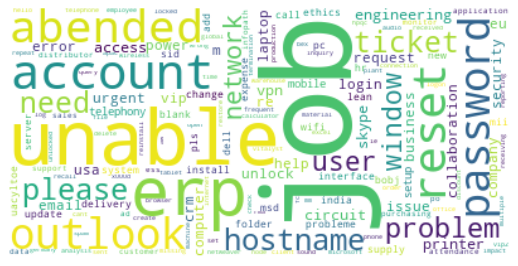

In [63]:
# Plotting the WordCloud image:

plt.imshow(word_cloud_t, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**Words :** unable, job, erp, password, outlook, need, ticket, abended, problem, plesae, account hostname, window, skype, use are frequently occurring.

Max words -  2384
Min words -  2


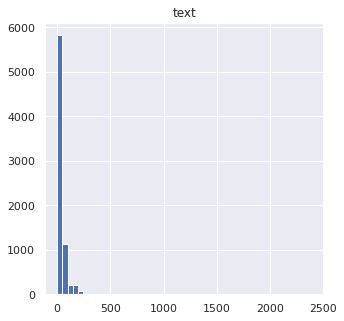

In [64]:
# Looking for max and min words in text:

text_word_count = []

# Populating the lists with sentence lengths:

for i in ticket_data["Translated_Text"]:
    text_word_count.append(len(i.split()))
print("Max words - ", max(text_word_count))
print("Min words - ", min(text_word_count))
length_df = pd.DataFrame({'text':text_word_count})
sns.set(rc = {'figure.figsize' : (5, 5)})
length_df.hist(bins = 50)
plt.show()

Maximum char in text -  3
Minimum char in text -  13266


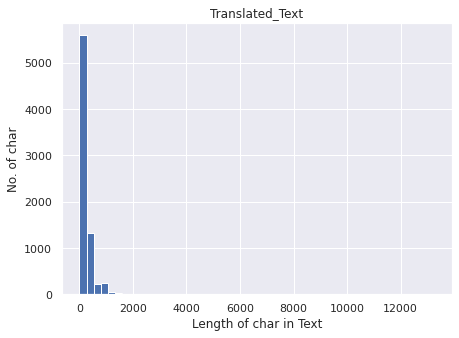

In [65]:
# Looking for max and min characters in text:

sns.set(rc = {'figure.figsize' : (7, 5)})
ticket_data["Translated_Text"].str.len().hist(bins = 50)
print("Maximum char in text - ", min(ticket_data["Translated_Text"].str.len()))
print("Minimum char in text - ", max(ticket_data["Translated_Text"].str.len()))
plt.title("Translated_Text")
plt.xlabel("Length of char in Text")
plt.ylabel("No. of char")
plt.show()

In [66]:
cnt=0
for i in ticket_data["Translated_Text"]:
    if(len(i.split())<=250):
        cnt=cnt+1
print(cnt/len(ticket_data["Translated_Text"]))

0.9913529333510709


99% text rows are having less than or equal to 250 words in it.

## Data Split:

In [67]:
# Independent feature X -> ticket_data["Translated_Text"]:
# Dependent feature y -> ticket_data["Assignment group"]:

X = ticket_data["Translated_Text"]
y = ticket_data["Assignment group"]

In [68]:
# Get maximum value of word index - ticket_data["Translated_Text"]:

X_word_index = []

for text in X:
    word_count = len(text.split())
    X_word_index.append(word_count)
    
print('Maximum no. of words in text : X - ', max(X_word_index))
print('Minimum no. of words in text : X - ', min(X_word_index))

# Get maximum length words of text - ticket_data["Translated_Text"]:

X_len_word = []

for text in X:
    text_len = len(text)
    X_len_word.append(text_len)
    
print('Maximum no. of char in text : X - ', max(X_len_word))
print('Minimum no. of char in text : X - ', min(X_len_word))
print()

# Get maximum value of word index - y:

y_word_index = []

for text in y:
    word_count = len(text.split())
    y_word_index.append(word_count)
    
print('Maximum no. of words in text : y - ', max(y_word_index))
print('Minimum no. of words in text : y - ', min(y_word_index))

# Get maximum length words of text - y:

y_len_word = []

for text in y:
    text_len = len(text)
    y_len_word.append(text_len)
    
print('Maximum no. of char in text : y - ', max(y_len_word))
print('Minimum no. of char in text : y - ', min(y_len_word))

Maximum no. of words in text : X -  2384
Minimum no. of words in text : X -  2
Maximum no. of char in text : X -  13266
Minimum no. of char in text : X -  3

Maximum no. of words in text : y -  1
Minimum no. of words in text : y -  1
Maximum no. of char in text : y -  6
Minimum no. of char in text : y -  5


In [69]:
# Label encoder - only one word in y for every row:

print("No. of unique values in y : ", len(set(y)))
le = LabelEncoder()
y = le.fit_transform(y.values)
print("No. of unique values in y : ", len(set(y)))

No. of unique values in y :  74
No. of unique values in y :  74


In [70]:
# Setting the values for vocab_size, max_text_length, output_category:

max_text_length_1 = 100
vocab_size = max(X_word_index)
max_text_length = 200
output_category = len(set(y))
max_text_length_2 = 300

-------------------------------------------------------------------------------
-------------------------------------------------------------------------------

## Model Building:

In [71]:
# Splitting the dataset:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Shape of train and test dataset:

print("Shape of X train set - ", X_train.shape)
print("Shape of y train set - ", y_train.shape)
print("Shape of X test set - ", X_test.shape)
print("Shape of y test set - ", y_test.shape)

Shape of X train set -  (5637,)
Shape of y train set -  (5637,)
Shape of X test set -  (1880,)
Shape of y test set -  (1880,)


In [72]:
# Tokenization:

feature_tokenizer = Tokenizer(num_words=vocab_size)
feature_tokenizer.fit_on_texts(X_train)
X_train = feature_tokenizer.texts_to_sequences(X_train)
X_test = feature_tokenizer.texts_to_sequences(X_test)

print("Number of Samples in X_train:", len(X_train))       
print("Number of Samples in X_test:", len(X_test))  
print("X_train[10] - ", X_train[10])

Number of Samples in X_train: 5637
Number of Samples in X_test: 1880
X_train[10] -  [571, 180, 1056, 1084, 463, 1231, 1, 1, 1, 1, 1, 205, 1231, 1, 1, 1, 1, 1, 1, 156]


In [73]:
# pad_sequences() -> All sequences in a list have the same length:

X_train_seq = pad_sequences(X_train, maxlen=max_text_length, padding='post',)
X_test_seq = pad_sequences(X_test, maxlen=max_text_length, padding='post',)

# Shape of original train and test dataset & train and test dataset after pad_sequence:

print("After pad_sequence : ")
print("Shape of X train seq set - ", X_train_seq.shape)
print("Shape of y train seq set - ", y_train.shape)
print("Shape of X test seq set - ", X_test_seq.shape)
print("Shape of y test seq set - ", y_test.shape)

After pad_sequence : 
Shape of X train seq set -  (5637, 200)
Shape of y train seq set -  (5637,)
Shape of X test seq set -  (1880, 200)
Shape of y test seq set -  (1880,)


In [74]:
# pad_sequences() -> All sequences in a list have the same length:

X_train_seq1 = pad_sequences(X_train, maxlen=max_text_length_1, padding='post',)
X_test_seq1 = pad_sequences(X_test, maxlen=max_text_length_1, padding='post',)

# Shape of original train and test dataset & train and test dataset after pad_sequence:

print("After pad_sequence : ")
print("Shape of X train seq set - ", X_train_seq1.shape)
print("Shape of y train seq set - ", y_train.shape)
print("Shape of X test seq set - ", X_test_seq1.shape)
print("Shape of y test seq set - ", y_test.shape)

After pad_sequence : 
Shape of X train seq set -  (5637, 100)
Shape of y train seq set -  (5637,)
Shape of X test seq set -  (1880, 100)
Shape of y test seq set -  (1880,)


In [75]:
# pad_sequences() -> All sequences in a list have the same length:

X_train_seq2 = pad_sequences(X_train, maxlen=max_text_length_2, padding='post',)
X_test_seq2 = pad_sequences(X_test, maxlen=max_text_length_2, padding='post',)

# Shape of original train and test dataset & train and test dataset after pad_sequence:

print("After pad_sequence : ")
print("Shape of X train seq set - ", X_train_seq2.shape)
print("Shape of y train seq set - ", y_train.shape)
print("Shape of X test seq set - ", X_test_seq2.shape)
print("Shape of y test seq set - ", y_test.shape)

After pad_sequence : 
Shape of X train seq set -  (5637, 300)
Shape of y train seq set -  (5637,)
Shape of X test seq set -  (1880, 300)
Shape of y test seq set -  (1880,)




### Model - 1

**Basic LSTM Model:**

In [76]:
# Building the model:

embedding_vector_length = 32
epoch = 10
model = Sequential()

# Add Embeddings:

# input_dim : Size of the vocabulary
# output_dim : Length of the vector for each word
# input_length : Maximum length of a sequence

embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, input_length=max_text_length)
model.add(embedding_layer)

# LSTM Model:

model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

#model.add(LSTM(128, activation='relu'))

model.add(Dropout(0.2))

# Add layers:

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(output_category, activation='softmax'))

# Compile the model:

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           76288     
                                                                 
 lstm (LSTM)                 (None, 128)               82432     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 74)                9

In [77]:
# Add EarlyStopping:

es = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=100)

# Fitting the model on training data:

hist = model.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test), epochs=epoch, batch_size=128, callbacks=[es], verbose=1)

Epoch 1/10
45/45 [==============================] - 49s 969ms/step - loss: 3.0632 - accuracy: 0.4282 - val_loss: 2.7104 - val_accuracy: 0.4266
Epoch 2/10
45/45 [==============================] - 44s 969ms/step - loss: 2.6631 - accuracy: 0.4366 - val_loss: 2.7028 - val_accuracy: 0.4266
Epoch 3/10
45/45 [==============================] - 43s 964ms/step - loss: 2.6664 - accuracy: 0.4366 - val_loss: 2.6836 - val_accuracy: 0.4266
Epoch 4/10
45/45 [==============================] - 43s 960ms/step - loss: 2.6573 - accuracy: 0.4366 - val_loss: 2.6837 - val_accuracy: 0.4271
Epoch 5/10
45/45 [==============================] - 44s 975ms/step - loss: 2.6450 - accuracy: 0.4371 - val_loss: 2.7074 - val_accuracy: 0.4277
Epoch 6/10
45/45 [==============================] - 43s 966ms/step - loss: 2.6582 - accuracy: 0.4355 - val_loss: 2.6746 - val_accuracy: 0.4266
Epoch 7/10
45/45 [==============================] - 43s 956ms/step - loss: 2.6496 - accuracy: 0.4366 - val_loss: 2.6695 - val_accuracy: 0.4266

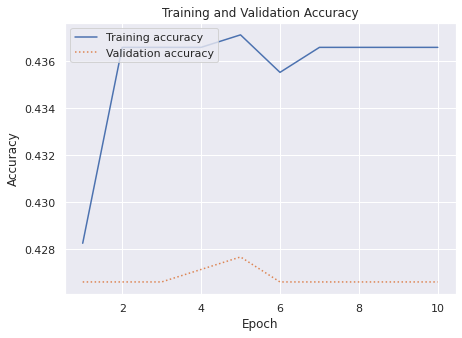

In [78]:
# Display Training and validation accuracy graph:

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

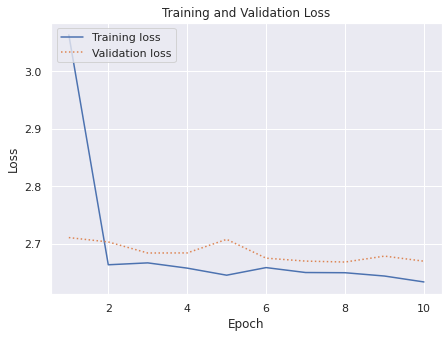

In [79]:
# Display training and validation loss graph:

loss = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val, ':', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

In [80]:
# Accuracy of train dataset(validation dataset):

train_scores = model.evaluate(X_train_seq, y_train, verbose=1)

print("train_scores - ", train_scores)
print("Accuracy of train dataset - %.2f%%" % (train_scores[1] * 100))

# Accuracy of test dataset(validation dataset):

test_scores = model.evaluate(X_test_seq, y_test, verbose=1)

print("test_scores - ", test_scores)
print("Accuracy of valiadation dataset - %.2f%%" % (test_scores[1] * 100))

177/177 [==============================] - 12s 66ms/step - loss: 2.6173 - accuracy: 0.4366
train_scores -  [2.617304801940918, 0.43657973408699036]
Accuracy of train dataset - 43.66%
59/59 [==============================] - 4s 67ms/step - loss: 2.6693 - accuracy: 0.4266
test_scores -  [2.6693248748779297, 0.4265957474708557]
Accuracy of valiadation dataset - 42.66%


In [81]:
# Save the model:

# pickle.dump(model, open(basic_model_file_path, "wb"))
pickle.dump(model, open("model1.pkl", "wb"))

In [82]:
# Evaluate the model:

loss1, accuracy1 = model.evaluate(X_test_seq, y_test, verbose=2)

print('Model 1 - Validation set -> Loss : %.2f  Accuracy: %.2f' % (loss1, accuracy1*100))

59/59 - 4s - loss: 2.6693 - accuracy: 0.4266 - 4s/epoch - 62ms/step
Model 1 - Validation set -> Loss : 2.67  Accuracy: 42.66


In [83]:
# Classification Report for training set:

y_train_pred1 = model.predict(X_train_seq)
y_train_pred1 = np.array([np.argmax(pred) for pred in y_train_pred1])

print('Classification Report:\n',classification_report(y_train, y_train_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.44      1.00      0.61      2461
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00       103
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00       194
           5       0.00      0.00      0.00        99
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00        32
           8       0.00      0.00      0.00        68
           9       0.00      0.00      0.00        48
          10       0.00      0.00      0.00        65
          11       0.00      0.00      0.00       144
          12       0.00      0.00      0.00       174
          13       0.00      0.00      0.00        23
          14       0.00      0.00      0.00        19
          15       0.00      0.00      0.00        24
          16       0.00      0.00      0.00        19
   

In [84]:
# Classification Report for test set:

y_test_pred1 = model.predict(X_test_seq)
y_test_pred1 = np.array([np.argmax(pred) for pred in y_test_pred1])

print('Classification Report:\n',classification_report(y_test, y_test_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.43      1.00      0.60       802
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        55
           5       0.00      0.00      0.00        43
           6       0.00      0.00      0.00        26
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00        23
          11       0.00      0.00      0.00        54
          12       0.00      0.00      0.00        62
          13       0.00      0.00      0.00        12
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         6
   

### Model - 2

**LSTM model with more layers:**

In [85]:
# Building the model:

embedding_vector_length = 32
epoch = 10
model2 = Sequential()

# Adding Embeddings:
# input_dim : Size of the vocabulary
# output_dim : Length of the vector for each word
# input_length : Maximum length of a sequence

embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, input_length=max_text_length)
model2.add(embedding_layer)

# LSTM Model:

model2.add(LSTM(256, return_sequences=True, recurrent_dropout=0.2))
model2.add(LSTM(128, return_sequences=True, activation='relu'))
model2.add(LSTM(output_category, activation='relu'))

# Adding layers:

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(output_category, activation='softmax'))

# Compiling the model:

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           76288     
                                                                 
 lstm_1 (LSTM)               (None, 200, 256)          295936    
                                                                 
 lstm_2 (LSTM)               (None, 200, 128)          197120    
                                                                 
 lstm_3 (LSTM)               (None, 74)                60088     
                                                                 
 flatten_1 (Flatten)         (None, 74)                0         
                                                                 
 dense_3 (Dense)             (None, 256)               19200     
                                                                 
 dense_4 (Dense)             (None, 128)              

In [86]:
# Add EarlyStopping:

es = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=10)

# Fitting the model on training data:

hist = model2.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test), epochs=epoch, batch_size=128, callbacks=[es], verbose=1)

Epoch 1/10
45/45 [==============================] - 79s 2s/step - loss: nan - accuracy: 0.4250 - val_loss: nan - val_accuracy: 0.4266
Epoch 2/10
45/45 [==============================] - 74s 2s/step - loss: nan - accuracy: 0.4366 - val_loss: nan - val_accuracy: 0.4266
Epoch 3/10
45/45 [==============================] - 74s 2s/step - loss: nan - accuracy: 0.4366 - val_loss: nan - val_accuracy: 0.4266
Epoch 4/10
45/45 [==============================] - 73s 2s/step - loss: nan - accuracy: 0.4366 - val_loss: nan - val_accuracy: 0.4266
Epoch 5/10
45/45 [==============================] - 73s 2s/step - loss: nan - accuracy: 0.4366 - val_loss: nan - val_accuracy: 0.4266
Epoch 6/10
45/45 [==============================] - 73s 2s/step - loss: nan - accuracy: 0.4366 - val_loss: nan - val_accuracy: 0.4266
Epoch 7/10
45/45 [==============================] - 73s 2s/step - loss: nan - accuracy: 0.4366 - val_loss: nan - val_accuracy: 0.4266
Epoch 8/10
45/45 [==============================] - 74s 2s/ste

### Model - 3

**Bidirectional LSTM with Relu Activation (GloVe Embedding(200d)):**

In [87]:
# For Jupyter:

#with ZipFile('glove.6B.zip', 'r') as z:
#    z.extractall('glove.6B')

In [88]:
# GloVe Embeddings(200):

num_words=len(feature_tokenizer.word_index)

print("Vocabulary size - ", num_words)
print("num_words : %s vocab_size : %s max_text_length : %s"%(num_words, vocab_size, max_text_length))

embedding_file_path = project_folder_path + "glove.6B.200d.txt"
#embedding_file_path = 'glove.6B/glove.6B.200d.txt'

embeddings = {}

for o in open(embedding_file_path, encoding="utf8"):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    embeddings[word] = embd
embedding_matrix = np.zeros((num_words+1, max_text_length))

for word, i in feature_tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Size of embeddings - ", len(embeddings.values()))
print("Embeddings shape - ", embedding_matrix.shape)
print("embedding_matrix - ")
embedding_matrix

Vocabulary size -  17012
num_words : 17012 vocab_size : 2384 max_text_length : 200
Size of embeddings -  400000
Embeddings shape -  (17013, 200)
embedding_matrix - 


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57345998,  0.54170001, -0.23477   , ...,  0.54417998,
        -0.23069   ,  0.34946999],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [89]:
# Building the Bidirectional LSTM model with Glove(200) Embeddings(ReLu):

input_layer = Input(shape=(max_text_length,),dtype=tensorflow.int64)
embed = Embedding(embedding_matrix.shape[0], output_dim=200, weights=[embedding_matrix], input_length=max_text_length, trainable=True)(input_layer)
bd_lstm = Bidirectional(LSTM(128))(embed)
dropout = Dropout(0.3)(bd_lstm)
dense = Dense(100, activation='relu')(dropout)
out = Dense(output_category, activation='softmax')(dense)

# Compiling the model:

model_bilstm = Model(input_layer, out)
model_bilstm.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_bilstm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 200, 200)          3402600   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              336896    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               25700     
                                                                 
 dense_7 (Dense)             (None, 74)                7474      
                                                             

In [90]:
# Fitting the model:

batch_size = 100
epochs = 20
hist_bilstm = model_bilstm.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
57/57 [==============================] - 9s 60ms/step - loss: 2.7474 - accuracy: 0.4573 - val_loss: 2.2575 - val_accuracy: 0.5144
Epoch 2/20
57/57 [==============================] - 2s 44ms/step - loss: 2.1103 - accuracy: 0.5171 - val_loss: 2.0166 - val_accuracy: 0.5346
Epoch 3/20
57/57 [==============================] - 2s 43ms/step - loss: 1.8635 - accuracy: 0.5522 - val_loss: 1.7849 - val_accuracy: 0.5617
Epoch 4/20
57/57 [==============================] - 2s 44ms/step - loss: 1.6412 - accuracy: 0.5934 - val_loss: 1.6505 - val_accuracy: 0.5941
Epoch 5/20
57/57 [==============================] - 2s 43ms/step - loss: 1.4648 - accuracy: 0.6220 - val_loss: 1.6304 - val_accuracy: 0.6053
Epoch 6/20
57/57 [==============================] - 2s 43ms/step - loss: 1.3054 - accuracy: 0.6541 - val_loss: 1.5383 - val_accuracy: 0.6085
Epoch 7/20
57/57 [==============================] - 2s 44ms/step - loss: 1.1880 - accuracy: 0.6814 - val_loss: 1.4860 - val_accuracy: 0.6223
Epoch 8/20
57

### Model - 4 

**Bidirectional LSTM with Tanh Activation (GloVe Embedding(200d)):**

In [91]:
# Building the Bidirectional LSTM model with Glove(200d) Embeddings:

input_layer = Input(shape=(max_text_length,), dtype=tensorflow.int64)
embed = Embedding(embedding_matrix.shape[0], output_dim=200, weights=[embedding_matrix], input_length=max_text_length, trainable=True)(input_layer)
bd_lstm22 = Bidirectional(LSTM(128))(embed)
dropout = Dropout(0.3)(bd_lstm22)
dense = Dense(100, activation='tanh')(dropout)
out = Dense(output_category, activation='softmax')(dense)

# Compiling the model:

model_bilstm22 = Model(input_layer, out)
model_bilstm22.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model_bilstm22.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 200, 200)          3402600   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              336896    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               25700     
                                                                 
 dense_9 (Dense)             (None, 74)                7474      
                                                           

In [92]:
# Fiting the model:

batch_size = 50
epochs = 30
hist_bilstm22 = model_bilstm22.fit(X_train_seq, y_train, validation_data=(X_test_seq, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/30
113/113 [==============================] - 8s 44ms/step - loss: 2.4112 - accuracy: 0.4957 - val_loss: 2.0142 - val_accuracy: 0.5330
Epoch 2/30
113/113 [==============================] - 4s 36ms/step - loss: 1.8444 - accuracy: 0.5625 - val_loss: 1.7295 - val_accuracy: 0.5872
Epoch 3/30
113/113 [==============================] - 4s 36ms/step - loss: 1.5499 - accuracy: 0.6055 - val_loss: 1.5949 - val_accuracy: 0.5910
Epoch 4/30
113/113 [==============================] - 4s 36ms/step - loss: 1.3558 - accuracy: 0.6427 - val_loss: 1.5089 - val_accuracy: 0.6154
Epoch 5/30
113/113 [==============================] - 4s 36ms/step - loss: 1.1822 - accuracy: 0.6846 - val_loss: 1.4863 - val_accuracy: 0.6154
Epoch 6/30
113/113 [==============================] - 4s 36ms/step - loss: 1.0317 - accuracy: 0.7190 - val_loss: 1.4717 - val_accuracy: 0.6239
Epoch 7/30
113/113 [==============================] - 4s 36ms/step - loss: 0.9106 - accuracy: 0.7486 - val_loss: 1.4664 - val_accuracy: 0.6266

In [93]:
# Classification Report for training set:

y_train_pred1 = model_bilstm22.predict(X_train_seq)
y_train_pred1 = np.array([np.argmax(pred) for pred in y_train_pred1])

print('Classification Report:\n',classification_report(y_train, y_train_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2461
           1       1.00      0.96      0.98        23
           2       0.96      0.99      0.98       103
           3       1.00      1.00      1.00        21
           4       0.99      0.99      0.99       194
           5       1.00      0.96      0.98        99
           6       1.00      0.99      0.99        90
           7       1.00      1.00      1.00        32
           8       1.00      0.99      0.99        68
           9       0.98      1.00      0.99        48
          10       0.98      0.97      0.98        65
          11       1.00      0.99      0.99       144
          12       0.98      1.00      0.99       174
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        19
          15       1.00      0.96      0.98        24
          16       0.95      1.00      0.97        19
   

In [94]:
# Classification Report for test set:

y_test_pred1 = model_bilstm22.predict(X_test_seq)
y_test_pred1 = np.array([np.argmax(pred) for pred in y_test_pred1])

print('Classification Report:\n',classification_report(y_test, y_test_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       802
           1       0.60      0.50      0.55         6
           2       0.66      0.53      0.58        36
           3       0.00      0.00      0.00         9
           4       0.54      0.56      0.55        55
           5       0.59      0.51      0.55        43
           6       0.42      0.38      0.40        26
           7       0.11      0.20      0.14         5
           8       0.22      0.24      0.23        17
           9       0.95      1.00      0.97        18
          10       0.31      0.35      0.33        23
          11       0.34      0.41      0.37        54
          12       0.49      0.39      0.43        62
          13       0.00      0.00      0.00        12
          14       0.40      0.22      0.29         9
          15       0.14      0.14      0.14         7
          16       0.20      0.17      0.18         6
   

### Model - 5

**Bidirectional LSTM with Relu Activation (GloVe Embedding(300d)):**

In [95]:
# GloVe Embeddings(300):

num_words=len(feature_tokenizer.word_index)

print("Vocabulary size - ", num_words)
print("num_words : %s vocab_size : %s max_text_length : %s"%(num_words, vocab_size, max_text_length_2))

embedding_file_path = project_folder_path + "glove.6B.300d.txt"
#embedding_file_path = 'glove.6B/glove.6B.300d.txt'

embeddings = {}

for o in open(embedding_file_path, encoding="utf8"):
    word = o.split(" ")[0]
    embd11 = o.split(" ")[1:]
    embd11 = np.asarray(embd11, dtype='float32')
    embeddings[word] = embd11
embedding_matrix = np.zeros((num_words+1, max_text_length_2))

for word, i in feature_tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Size of embeddings - ", len(embeddings.values()))
print("Embeddings shape - ", embedding_matrix.shape)
print("embedding_matrix - ")
embedding_matrix

Vocabulary size -  17012
num_words : 17012 vocab_size : 2384 max_text_length : 300
Size of embeddings -  400000
Embeddings shape -  (17013, 300)
embedding_matrix - 


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.25756001, -0.057132  , -0.67189997, ..., -0.16043   ,
         0.046744  , -0.070621  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [96]:
# Building the Bidirectional LSTM model with Glove(300d) Embeddings:

input_layer = Input(shape=(max_text_length_2,),dtype=tensorflow.int64)
embed11 = Embedding(embedding_matrix.shape[0], output_dim=300, weights=[embedding_matrix], input_length=max_text_length, trainable=True)(input_layer)
bd_lstm11 = Bidirectional(LSTM(128))(embed11)
dropout = Dropout(0.3)(bd_lstm11)
dense = Dense(100, activation='relu')(dropout)
out = Dense(output_category, activation='softmax')(dense)

# Compiling the model:

model_bilstm11 = Model(input_layer, out)
model_bilstm11.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_bilstm11.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 300, 300)          5103900   
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              439296    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               25700     
                                                                 
 dense_11 (Dense)            (None, 74)                7474      
                                                           

In [97]:
# Fiting the model:

batch_size = 100
epochs = 20
hist_bilstm11 = model_bilstm11.fit(X_train_seq2, y_train, validation_data=(X_test_seq2, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
57/57 [==============================] - 8s 83ms/step - loss: 2.6834 - accuracy: 0.4627 - val_loss: 2.1480 - val_accuracy: 0.5176
Epoch 2/20
57/57 [==============================] - 4s 68ms/step - loss: 2.0067 - accuracy: 0.5299 - val_loss: 1.8749 - val_accuracy: 0.5484
Epoch 3/20
57/57 [==============================] - 4s 68ms/step - loss: 1.7202 - accuracy: 0.5870 - val_loss: 1.6977 - val_accuracy: 0.5952
Epoch 4/20
57/57 [==============================] - 4s 68ms/step - loss: 1.4852 - accuracy: 0.6330 - val_loss: 1.5713 - val_accuracy: 0.6101
Epoch 5/20
57/57 [==============================] - 4s 68ms/step - loss: 1.3046 - accuracy: 0.6667 - val_loss: 1.5540 - val_accuracy: 0.6106
Epoch 6/20
57/57 [==============================] - 4s 68ms/step - loss: 1.1673 - accuracy: 0.6931 - val_loss: 1.5147 - val_accuracy: 0.6191
Epoch 7/20
57/57 [==============================] - 4s 68ms/step - loss: 1.0170 - accuracy: 0.7389 - val_loss: 1.4854 - val_accuracy: 0.6266
Epoch 8/20
57

### Model 6

**Bidirectional LSTM with Tanh Activation (GloVe Embedding(300d)):**

In [98]:
# Building the Bidirectional LSTM model with Glove(300d) Embeddings:

input_layer = Input(shape=(max_text_length_2,), dtype=tensorflow.int64)
embed11 = Embedding(embedding_matrix.shape[0], output_dim=300, weights=[embedding_matrix], input_length=max_text_length, trainable=True)(input_layer)
bd_lstm21 = Bidirectional(LSTM(128))(embed11)
dropout = Dropout(0.3)(bd_lstm21)
dense = Dense(100, activation='tanh')(dropout)
out = Dense(output_category, activation='softmax')(dense)

# Compiling the model:

model_bilstm21 = Model(input_layer, out)
model_bilstm21.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model_bilstm21.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 300, 300)          5103900   
                                                                 
 bidirectional_3 (Bidirectio  (None, 256)              439296    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               25700     
                                                                 
 dense_13 (Dense)            (None, 74)                7474      
                                                           

In [99]:
# Fitting the model:

batch_size = 50
epochs = 30
hist_bilstm21 = model_bilstm21.fit(X_train_seq2, y_train, validation_data=(X_test_seq2, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/30
113/113 [==============================] - 11s 60ms/step - loss: 2.3429 - accuracy: 0.5017 - val_loss: 1.9454 - val_accuracy: 0.5420
Epoch 2/30
113/113 [==============================] - 6s 52ms/step - loss: 1.7505 - accuracy: 0.5757 - val_loss: 1.6692 - val_accuracy: 0.5856
Epoch 3/30
113/113 [==============================] - 6s 53ms/step - loss: 1.4578 - accuracy: 0.6266 - val_loss: 1.5420 - val_accuracy: 0.6229
Epoch 4/30
113/113 [==============================] - 6s 53ms/step - loss: 1.2344 - accuracy: 0.6816 - val_loss: 1.4818 - val_accuracy: 0.6277
Epoch 5/30
113/113 [==============================] - 6s 53ms/step - loss: 1.0472 - accuracy: 0.7192 - val_loss: 1.4860 - val_accuracy: 0.6250
Epoch 6/30
113/113 [==============================] - 6s 53ms/step - loss: 0.8994 - accuracy: 0.7515 - val_loss: 1.5246 - val_accuracy: 0.6287
Epoch 7/30
113/113 [==============================] - 6s 53ms/step - loss: 0.7615 - accuracy: 0.7905 - val_loss: 1.5280 - val_accuracy: 0.621

In [100]:
# Classification Report for training set:

y_train_pred2 = model_bilstm21.predict(X_train_seq2)
y_train_pred2 = np.array([np.argmax(pred) for pred in y_train_pred2])

print('Classification Report:\n',classification_report(y_train, y_train_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2461
           1       1.00      0.96      0.98        23
           2       0.97      0.99      0.98       103
           3       1.00      1.00      1.00        21
           4       0.98      0.99      0.99       194
           5       1.00      0.98      0.99        99
           6       1.00      0.98      0.99        90
           7       1.00      1.00      1.00        32
           8       1.00      1.00      1.00        68
           9       0.98      1.00      0.99        48
          10       0.98      0.98      0.98        65
          11       1.00      0.94      0.97       144
          12       0.98      1.00      0.99       174
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        24
          16       0.95      1.00      0.97        19
   

In [101]:
# Classification Report for test set:

y_test_pred2 = model_bilstm21.predict(X_test_seq2)
y_test_pred2 = np.array([np.argmax(pred) for pred in y_test_pred2])

print('Classification Report:\n',classification_report(y_test, y_test_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       802
           1       0.67      0.33      0.44         6
           2       0.59      0.64      0.61        36
           3       0.00      0.00      0.00         9
           4       0.54      0.58      0.56        55
           5       0.44      0.67      0.53        43
           6       0.58      0.42      0.49        26
           7       0.10      0.20      0.13         5
           8       0.58      0.41      0.48        17
           9       0.95      1.00      0.97        18
          10       0.33      0.39      0.36        23
          11       0.26      0.19      0.22        54
          12       0.47      0.44      0.45        62
          13       0.00      0.00      0.00        12
          14       0.14      0.11      0.12         9
          15       0.43      0.43      0.43         7
          16       0.29      0.33      0.31         6
   

### Model 7

**LSTM model with ReLu activation (Word2Vec Embedding):**

In [102]:
tokens =[word_tokenize(sent) for sent in ticket_data['Translated_Text']]
tokens

[['login',
  'issue',
  'verified',
  'user',
  'details',
  'employee',
  'manager',
  'name',
  'x000d',
  'checked',
  'the',
  'user',
  'name',
  'in',
  'ad',
  'and',
  'reset',
  'the',
  'password',
  'x000d',
  'advised',
  'the',
  'user',
  'to',
  'login',
  'and',
  'check',
  'x000d',
  'caller',
  'confirmed',
  'that',
  'he',
  'was',
  'able',
  'to',
  'login',
  'x000d',
  'issue',
  'resolved'],
 ['outlook',
  'x000d',
  'x000d',
  'received',
  'from',
  'hmjdrvpb',
  'komuaywn',
  'gmail',
  'com',
  'x000d',
  'x000d',
  'hello',
  'team',
  'x000d',
  'x000d',
  'my',
  'meetings',
  'skype',
  'meetings',
  'etc',
  'are',
  'not',
  'appearing',
  'in',
  'my',
  'outlook',
  'calendar',
  'can',
  'somebody',
  'please',
  'advise',
  'how',
  'to',
  'correct',
  'this',
  'x000d',
  'x000d',
  'kind'],
 ['cant',
  'log',
  'in',
  'to',
  'vpn',
  'x000d',
  'x000d',
  'received',
  'from',
  'eylqgodm',
  'ybqkwiam',
  'gmail',
  'com',
  'x000d',
  'x00

In [103]:
os.chdir('./')

In [104]:
# Vocabulary:

w2vec_vocab = tokens

# Default dimensions:

vector_size = 100

In [105]:
# Giving minimum word count as default value which is 1:
# Default dimensions size=100:
# Parameter senetences is list of lists containing tokens of words:

W2Vec = Word2Vec(sentences=w2vec_vocab, size=100, min_count=1 )

# Saving the model:

W2Vec.save('word2vec.model')

In [106]:
# Number of tokens in total:

print(len(tokens))

7517


In [107]:
#Loading the saved model for training:

loaded_model = Word2Vec.load('word2vec.model')
loaded_model.train(epochs=1, total_examples=len(tokens), sentences=tokens)

#totalexamples=model.corpus_count and use model.build_vocab

(278946, 353820)

In [108]:
print('Loaded Model:\n',loaded_model)

words_w2v = list(loaded_model.wv.vocab)

print('words are:\n')

# Getying first five tokens of tokenized sentences:

w2vec_vocab[:5]

Loaded Model:
 Word2Vec(vocab=20701, size=100, alpha=0.025)
words are:



[['login',
  'issue',
  'verified',
  'user',
  'details',
  'employee',
  'manager',
  'name',
  'x000d',
  'checked',
  'the',
  'user',
  'name',
  'in',
  'ad',
  'and',
  'reset',
  'the',
  'password',
  'x000d',
  'advised',
  'the',
  'user',
  'to',
  'login',
  'and',
  'check',
  'x000d',
  'caller',
  'confirmed',
  'that',
  'he',
  'was',
  'able',
  'to',
  'login',
  'x000d',
  'issue',
  'resolved'],
 ['outlook',
  'x000d',
  'x000d',
  'received',
  'from',
  'hmjdrvpb',
  'komuaywn',
  'gmail',
  'com',
  'x000d',
  'x000d',
  'hello',
  'team',
  'x000d',
  'x000d',
  'my',
  'meetings',
  'skype',
  'meetings',
  'etc',
  'are',
  'not',
  'appearing',
  'in',
  'my',
  'outlook',
  'calendar',
  'can',
  'somebody',
  'please',
  'advise',
  'how',
  'to',
  'correct',
  'this',
  'x000d',
  'x000d',
  'kind'],
 ['cant',
  'log',
  'in',
  'to',
  'vpn',
  'x000d',
  'x000d',
  'received',
  'from',
  'eylqgodm',
  'ybqkwiam',
  'gmail',
  'com',
  'x000d',
  'x00

In [109]:
# Getting numpy vector of a word:

get_vector = loaded_model.wv['outlook']

# Getting other similar words:
    
similarily = loaded_model.wv.most_similar('outlook', topn=10)

In [110]:
# Numpy array of digits/vectors of a word 'outlook' as mentioned in code:

get_vector

array([ 9.33805883e-01, -2.68322563e+00, -6.48555458e-01,  3.64668399e-01,
        1.15340626e+00,  5.90855002e-01, -7.65626371e-01,  9.66638565e-01,
       -9.73633289e-01,  1.44313097e+00,  5.86817920e-01,  1.05199027e+00,
        2.16800645e-01, -1.43532979e+00, -1.66227615e+00,  2.16541365e-01,
        1.49358749e+00,  2.53143698e-01,  1.18476009e+00,  7.38401294e-01,
       -5.20597160e-01,  1.42256916e+00, -3.95113498e-01, -6.10955477e-01,
        1.04533756e+00, -6.65983438e-01,  7.19544590e-01,  6.70975596e-02,
        6.83661342e-01, -1.05185413e+00, -6.91033185e-01,  1.88790448e-03,
       -1.32340050e+00,  2.18741387e-01,  5.83233953e-01, -1.42441082e+00,
        1.72391546e+00, -4.30883467e-02,  1.36043727e+00,  8.26122940e-01,
       -7.34083474e-01, -2.26343796e-01,  1.39019400e-01, -1.24237776e-01,
        2.00269604e+00, -8.49577308e-01,  1.57672238e+00, -1.11373222e+00,
        2.74774581e-01, -8.33966553e-01, -2.06173420e+00,  2.83870482e+00,
       -1.21600163e+00, -

In [111]:
# Top 10 similar words to the word 'outlook' as in code, based on probability which is highest:

similarily

[('crm', 0.9451643228530884),
 ('skype', 0.9100817441940308),
 ('excel', 0.8837888836860657),
 ('emails', 0.8836100697517395),
 ('dynamics', 0.8669717907905579),
 ('updating', 0.8600777387619019),
 ('opening', 0.8503744602203369),
 ('vlc', 0.8497145175933838),
 ('word', 0.8496527671813965),
 ('msd', 0.8413385152816772)]

In [112]:
# Getting other similar words:

word9 = str()

def similarity(word9):
    word9 = str(input('Enter the Word:'))
    return loaded_model.wv.most_similar(positive=word9, negative=None, topn=10)

In [113]:
similarity(word9)

Enter the Word:skype


[('audio', 0.9511563181877136),
 ('option', 0.9279240965843201),
 ('emails', 0.9236089587211609),
 ('meeting', 0.9182484149932861),
 ('outlook', 0.9100818634033203),
 ('excel', 0.9080254435539246),
 ('opening', 0.907086968421936),
 ('while', 0.8969569802284241),
 ('join', 0.8961856365203857),
 ('issues', 0.89435875415802)]

In [114]:
vec_word = str()

def vector(vec_word):
    vec_word = str(input('Enter a word to get numpy vectors:\n'))
  #vec_word.append(inp)
    if vec_word in W2Vec.wv.vocab:
        return loaded_model.wv[vec_word]
    else:
        print('wrong input')

In [115]:
vector(vec_word)

Enter a word to get numpy vectors:
skype


array([ 1.2722533 , -1.481156  ,  0.11963452, -0.03373614,  0.76051843,
        0.59261465, -0.03745499,  1.2432195 , -0.60473645,  0.77485967,
        0.61003286,  1.5480298 ,  0.58859235, -1.339872  , -1.7663101 ,
       -0.0159251 ,  1.0773879 ,  0.6118535 ,  1.0826161 ,  0.15554929,
        0.01370507,  1.0422055 ,  0.21860912, -0.04258297,  0.39407796,
       -0.2378124 ,  0.6639731 , -0.27492428,  0.07451682, -0.7418102 ,
       -1.0926352 ,  0.31453928, -1.2815874 ,  0.29406732,  0.17585057,
       -1.1995418 ,  1.4807668 ,  0.43432572,  1.263168  ,  0.36092728,
       -0.07267449,  0.222005  ,  0.09409504,  0.17535053,  1.7168556 ,
       -0.6383611 ,  1.0286704 , -0.53489834,  0.1635711 , -0.26720962,
       -1.1452545 ,  2.8193269 , -0.952348  , -0.3094591 , -1.482277  ,
       -1.7255793 , -0.6225668 , -0.8083417 ,  0.23722029, -0.24202307,
       -0.0650033 , -0.04064715, -1.3562195 ,  1.3989588 ,  1.2370117 ,
        1.5427623 , -0.8897095 , -0.8929768 ,  0.06961467,  0.02

In [116]:
X_w2v = W2Vec[W2Vec.wv.vocab]

In [117]:
print(X_w2v.shape)

(20701, 100)


#### Using PCA for Visualizing:

In [118]:
# Setting n_compoennts equal to 2:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_w2v)

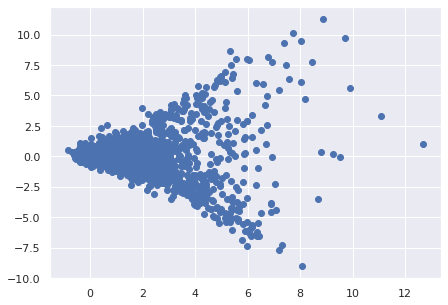

In [119]:
# Visualizing using scatter plot:

plt.scatter(x=pca_result[: ,0], y=pca_result[: ,1])
plt.show()

In [120]:
vocab_len=[len(w) for w in w2vec_vocab]
max_words = max(vocab_len)

print('maximum words are:',max_words)

maximum words are: 2384


#### Model (With Word2Vec Embedddings)

In [121]:
# Building LSTM model with Word2Vec embeddings:

#embedding_vector_length = 32

epoch = 10
model_wv = Sequential()

# Adding Embeddings:

# input_dim : Size of the vocabulary
# output_dim : Length of the vector for each word
# input_length : Maximum length of a sequence

embedding_layer = Embedding(input_dim=X_w2v.shape[0], output_dim=100, weights=[X_w2v], input_length=max_text_length_1)
model_wv.add(embedding_layer)

# LSTM Model:

model_wv.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

model_wv.add(Dropout(0.2))

# Adding layers:

model_wv.add(Flatten())
model_wv.add(Dense(256, activation='relu'))
model_wv.add(Dense(128, activation='relu'))
model_wv.add(Dense(output_category, activation='softmax'))

# Compiling the model:

model_wv.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_wv.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          2070100   
                                                                 
 lstm_8 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 256)               33024     
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 74)               

In [122]:
# Adding EarlyStopping:

es1 = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=100)

In [123]:
# Fitting the model on training data:

hist1 = model_wv.fit(X_train_seq1, y_train, validation_data=(X_test_seq1, y_test), epochs=epoch, batch_size=128, callbacks=[es], verbose=1)

Epoch 1/10
45/45 [==============================] - 25s 492ms/step - loss: 2.8493 - accuracy: 0.4261 - val_loss: 2.6647 - val_accuracy: 0.4484
Epoch 2/10
45/45 [==============================] - 22s 484ms/step - loss: 2.6332 - accuracy: 0.4515 - val_loss: 2.6329 - val_accuracy: 0.4484
Epoch 3/10
45/45 [==============================] - 25s 560ms/step - loss: 2.6152 - accuracy: 0.4536 - val_loss: 2.6276 - val_accuracy: 0.4484
Epoch 4/10
45/45 [==============================] - 22s 494ms/step - loss: 2.6017 - accuracy: 0.4533 - val_loss: 2.5770 - val_accuracy: 0.4495
Epoch 5/10
45/45 [==============================] - 22s 479ms/step - loss: 2.5687 - accuracy: 0.4540 - val_loss: 2.5432 - val_accuracy: 0.4484
Epoch 6/10
45/45 [==============================] - 22s 484ms/step - loss: 2.5071 - accuracy: 0.4533 - val_loss: 2.4673 - val_accuracy: 0.4511
Epoch 7/10
45/45 [==============================] - 23s 497ms/step - loss: 2.4258 - accuracy: 0.4547 - val_loss: 2.3594 - val_accuracy: 0.4527

In [124]:
# Accuracy of train dataset(validation dataset):

train_scores = model_wv.evaluate(X_train_seq1, y_train, verbose=1)

print("train_scores - ", train_scores)
print("Accuracy of train dataset - %.2f%%" % (train_scores[1] * 100))

# Accuracy of test dataset(validation dataset):

test_scores = model_wv.evaluate(X_test_seq1, y_test, verbose=1)

print("test_scores - ", test_scores)
print("Accuracy of valiadation dataset - %.2f%%" % (test_scores[1] * 100))

177/177 [==============================] - 6s 35ms/step - loss: 2.0918 - accuracy: 0.5104
train_scores -  [2.091841459274292, 0.5103778839111328]
Accuracy of train dataset - 51.04%
59/59 [==============================] - 2s 34ms/step - loss: 2.1988 - accuracy: 0.4989
test_scores -  [2.1988282203674316, 0.49893617630004883]
Accuracy of valiadation dataset - 49.89%


### Model 8

**LSTM model with Tanh activation (Word2Vec Embedding):**

In [125]:
# Building LSTM model with Word2Vec embeddings:

embedding_vector_length = 32
epoch = 10
model_wv2 = Sequential()

# Adding Embeddings:

# input_dim : Size of the vocabulary
# output_dim : Length of the vector for each word
# input_length : Maximum length of a sequence

embedding_layer = Embedding(input_dim=X_w2v.shape[0], output_dim=100, weights=[X_w2v], input_length=max_text_length_1)
model_wv2.add(embedding_layer)

# LSTM Model:

lstm_out = 196

model_wv2.add(LSTM(256, return_sequences=True, recurrent_dropout=0.2)) 

model_wv2.add(LSTM(128, return_sequences=True, activation='tanh'))
model_wv2.add(LSTM(output_category, activation='tanh')) 

# Adding layers:

model_wv2.add(Flatten())
model_wv2.add(Dense(256, activation='tanh'))
model_wv2.add(Dense(128, activation='tanh'))
model_wv2.add(Dense(output_category, activation='softmax'))

# Compiling the model:

model_wv2.compile(loss='sparse_categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
print(model_wv2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          2070100   
                                                                 
 lstm_9 (LSTM)               (None, 100, 256)          365568    
                                                                 
 lstm_10 (LSTM)              (None, 100, 128)          197120    
                                                                 
 lstm_11 (LSTM)              (None, 74)                60088     
                                                                 
 flatten_3 (Flatten)         (None, 74)                0         
                                                                 
 dense_17 (Dense)            (None, 256)               19200     
                                                                 
 dense_18 (Dense)            (None, 128)              

In [126]:
# epoch = 10
# Adding EarlyStopping:

es_w = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=100)

In [127]:
# Fitting the model on training data:
hist_w = model_wv2.fit(X_train_seq1, y_train, validation_data=(X_test_seq1, y_test), epochs=epoch, batch_size=300, callbacks=[es_w], verbose=1)

Epoch 1/10
19/19 [==============================] - 15s 483ms/step - loss: 4.1224 - accuracy: 0.3431 - val_loss: 3.9521 - val_accuracy: 0.4266
Epoch 2/10
19/19 [==============================] - 8s 424ms/step - loss: 3.8132 - accuracy: 0.4366 - val_loss: 3.6876 - val_accuracy: 0.4266
Epoch 3/10
19/19 [==============================] - 8s 426ms/step - loss: 3.5560 - accuracy: 0.4366 - val_loss: 3.4565 - val_accuracy: 0.4266
Epoch 4/10
19/19 [==============================] - 8s 422ms/step - loss: 3.3450 - accuracy: 0.4366 - val_loss: 3.2871 - val_accuracy: 0.4266
Epoch 5/10
19/19 [==============================] - 8s 427ms/step - loss: 3.2047 - accuracy: 0.4366 - val_loss: 3.1870 - val_accuracy: 0.4266
Epoch 6/10
19/19 [==============================] - 8s 424ms/step - loss: 3.1255 - accuracy: 0.4366 - val_loss: 3.1324 - val_accuracy: 0.4266
Epoch 7/10
19/19 [==============================] - 8s 422ms/step - loss: 3.0802 - accuracy: 0.4366 - val_loss: 3.0975 - val_accuracy: 0.4266
Epoch

In [128]:
# Accuracy of train dataset(validation dataset):

train_scores = model_wv2.evaluate(X_train_seq1, y_train, verbose=1)

print("train_scores - ", train_scores)
print("Accuracy of train dataset - %.2f%%" % (train_scores[1] * 100))

# Accuracy of test dataset(validation dataset):

test_scores = model_wv2.evaluate(X_test_seq1, y_test, verbose=1)

print("test_scores - ", test_scores)
print("Accuracy of valiadation dataset - %.2f%%" % (test_scores[1] * 100))

177/177 [==============================] - 7s 39ms/step - loss: 2.9895 - accuracy: 0.4366
train_scores -  [2.9895412921905518, 0.43657973408699036]
Accuracy of train dataset - 43.66%
59/59 [==============================] - 2s 42ms/step - loss: 3.0245 - accuracy: 0.4266
test_scores -  [3.0244803428649902, 0.4265957474708557]
Accuracy of valiadation dataset - 42.66%


### Model 9

**Model on Top 5 Assignment groups data:**

In [129]:
# Group-By Group -> Count no. of Translated_Text:

ticket_data_shortD_count1 = ticket_data.groupby('Assignment group').agg({'Translated_Text' : 'count'}).reset_index()
ticket_data_shortD_count_sort1 = ticket_data_shortD_count1.sort_values(['Translated_Text', 'Assignment group'], ascending = [0, 1])
ticket_data_shortD_count_sort1.rename(columns = {'Assignment group': 'Group', 'Translated_Text': 'Count_of_Text'}, inplace=True)
ticket_data_shortD_count_sort1.head(5)

Group  Count_of_Text
0    GRP_0           3263
72   GRP_8            641
73   GRP_9            251
4   GRP_12            249
12   GRP_2            236

In [130]:
group0_df = ticket_data[ticket_data["Assignment group"] == "GRP_0"]
group0_df = group0_df.sample(n = 1000)
group8_df = ticket_data[ticket_data["Assignment group"] == "GRP_8"]
group9_df = ticket_data[ticket_data["Assignment group"] == "GRP_9"]
group12_df = ticket_data[ticket_data["Assignment group"] == "GRP_12"]
group2_df = ticket_data[ticket_data["Assignment group"] == "GRP_2"]

# Creating Dataframe:

frames = [group0_df, group8_df, group9_df, group12_df, group2_df]
ticket_data_top5_group = pd.concat(frames)
ticket_data_top5_group.shape

(2377, 8)

In [131]:
# Creating X and Y variables:

Xg = ticket_data_top5_group["Translated_Text"]
yg = ticket_data_top5_group["Assignment group"]

In [132]:
# Label encoder - only one word in yg for everyg row:

print("No. of unique values in yg : ", len(set(yg)))
le_g = LabelEncoder()
yg = le_g.fit_transform(yg.values)
print("No. of unique values in yg : ", len(set(yg)))

# Get maximum value of word index - ticket_data["Translated_Text"]:

Xg_word_index = []
for text in Xg:
    word_count = len(text.split())
    Xg_word_index.append(word_count)
    
print('Maximum no. of words in text : Xg - ', max(Xg_word_index))
print('Minimum no. of words in text : Xg - ', min(Xg_word_index))

# Setting the values for vocab_size, max_text_length, output_categoryg:

vocab_size_g = max(Xg_word_index)
max_text_length_g = max_text_length #200
output_category_g = len(set(yg))

# Splitting the dataset:

Xg_train, Xg_test, yg_train, yg_test = train_test_split(Xg, yg, test_size = 0.25, random_state=42)

# Shape of train and test dataset:

print("Shape of Xg train set - ", Xg_train.shape)
print("Shape of yg train set - ", yg_train.shape)
print("Shape of Xg test set - ", Xg_test.shape)
print("Shape of yg test set - ", yg_test.shape)

# Tokenization:
# feature_tokenizer = Tokenizer(num_words=max_features)

feature_tokenizer_g = Tokenizer(num_words=vocab_size_g)
feature_tokenizer_g.fit_on_texts(Xg_train)
Xg_train = feature_tokenizer.texts_to_sequences(Xg_train)
Xg_test = feature_tokenizer.texts_to_sequences(Xg_test)

print("Number of Samples in Xg_train:", len(Xg_train))       
print("Number of Samples in Xg_test:", len(Xg_test))  
print("Xg_train[10] - ", Xg_train[10])

# pad_sequences() -> All sequences in a list have the same length:

Xg_train_seq = pad_sequences(Xg_train, maxlen=max_text_length_g, padding='post',)
Xg_test_seq = pad_sequences(Xg_test, maxlen=max_text_length_g, padding='post',)

# Shape of original train and test dataset & train and test dataset after pad_sequence:

print("After pad_sequence : ")
print("Shape of X train seq set - ", Xg_train_seq.shape)
print("Shape of yg train seq set - ", yg_train.shape)
print("Shape of X test seq set - ", Xg_test_seq.shape)
print("Shape of yg test seq set - ", yg_test.shape)

No. of unique values in yg :  5
No. of unique values in yg :  5
Maximum no. of words in text : Xg -  2384
Minimum no. of words in text : Xg -  3
Shape of Xg train set -  (1782,)
Shape of yg train set -  (1782,)
Shape of Xg test set -  (595,)
Shape of yg test set -  (595,)
Number of Samples in Xg_train: 1782
Number of Samples in Xg_test: 595
Xg_train[10] -  [5, 38, 31, 4, 5, 27, 17, 432, 633, 414, 839, 260, 891, 21, 18, 8, 50, 16, 15, 6, 1, 1, 8, 49, 1834, 15, 6, 131, 432, 633, 414, 839, 141, 795, 375, 155, 1, 509, 448, 766, 33, 1, 115, 814, 2, 147, 128, 12, 629, 51, 1, 1, 5, 38, 31, 4, 5, 27, 17, 432, 633, 414, 839, 260, 891, 21]
After pad_sequence : 
Shape of X train seq set -  (1782, 200)
Shape of yg train seq set -  (1782,)
Shape of X test seq set -  (595, 200)
Shape of yg test seq set -  (595,)


In [133]:
# Setting values:

vocab_size_g = max(Xg_word_index)
max_text_length_g = max_text_length #200
output_category_g = len(set(yg))

In [134]:
# GloVe Embeddings(200d):

num_words_g=len(feature_tokenizer_g.word_index)

print("Vocabulary size - ", num_words_g)

vocab_size_g2 = len(feature_tokenizer_g.word_index ) + 1

print(num_words_g, vocab_size_g, max_text_length_g, vocab_size_g2)

embedding_file_path = project_folder_path + "glove.6B.200d.txt"

embeddings = {}

for o in open(embedding_file_path):
    word = o.split(" ")[0]
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    embeddings[word] = embd
#embedding_matrix = np.zeros((num_words, max_text_length))
embedding_matrix_g = np.zeros((vocab_size_g2, max_text_length_g))

for word, i in feature_tokenizer_g.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix_g[i] = embedding_vector

print("Size of embeddings - ", len(embeddings.values()))
print("embedding_matrix - ")
embedding_matrix_g

embedding_matrix_g.shape

Vocabulary size -  8076
8076 2384 200 8077
Size of embeddings -  400000
embedding_matrix - 


(8077, 200)

In [135]:
# Building the Bidirectional LSTM model:

input_layer = Input(shape=(max_text_length_g,),dtype=tensorflow.int64)
# input_layer = Input(shape=(126,),dtype=tf.int64)
embed = Embedding(embedding_matrix_g.shape[0], output_dim=200, weights=[embedding_matrix_g], input_length=max_text_length_g, trainable=True)(input_layer)
bd_lstm_g = Bidirectional(LSTM(128, return_sequences=True))(embed)
dropout = Dropout(0.3)(bd_lstm_g)
flatten = Flatten()(dropout)
dense = Dense(100, activation='tanh')(flatten)
out = Dense(output_category_g, activation='softmax')(dense)

# Compiling the model:

model_bilstm_g = Model(input_layer, out)
model_bilstm_g.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model_bilstm_g.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding_8 (Embedding)     (None, 200, 200)          1615400   
                                                                 
 bidirectional_4 (Bidirectio  (None, 200, 256)         336896    
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 200, 256)          0         
                                                                 
 flatten_4 (Flatten)         (None, 51200)             0         
                                                                 
 dense_20 (Dense)            (None, 100)               5120100   
                                                           

In [136]:
# Fitting the model:

batch_size = 50
epochs = 50
hist_bilstm_g = model_bilstm_g.fit(Xg_train_seq, yg_train, validation_data=(Xg_test_seq, yg_test), batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/50
36/36 [==============================] - 6s 62ms/step - loss: 1.2238 - accuracy: 0.6352 - val_loss: 0.6719 - val_accuracy: 0.7496
Epoch 2/50
36/36 [==============================] - 1s 38ms/step - loss: 0.4117 - accuracy: 0.8440 - val_loss: 0.5988 - val_accuracy: 0.7899
Epoch 3/50
36/36 [==============================] - 1s 37ms/step - loss: 0.2441 - accuracy: 0.9102 - val_loss: 0.6172 - val_accuracy: 0.7899
Epoch 4/50
36/36 [==============================] - 1s 38ms/step - loss: 0.1522 - accuracy: 0.9416 - val_loss: 0.6195 - val_accuracy: 0.8101
Epoch 5/50
36/36 [==============================] - 1s 37ms/step - loss: 0.1034 - accuracy: 0.9624 - val_loss: 0.6451 - val_accuracy: 0.8218
Epoch 6/50
36/36 [==============================] - 1s 37ms/step - loss: 0.0840 - accuracy: 0.9669 - val_loss: 0.6820 - val_accuracy: 0.8134
Epoch 7/50
36/36 [==============================] - 1s 38ms/step - loss: 0.0754 - accuracy: 0.9691 - val_loss: 0.7132 - val_accuracy: 0.7966
Epoch 8/50
36

In [137]:
# Evaluating the model:

lossg, accuracyg = model_bilstm_g.evaluate(Xg_test_seq, yg_test, verbose=2)

print('Model (Top 5 group data) - Validation set -> Loss : %.2f  Accuracy: %.2f' % (lossg, accuracyg*100))

19/19 - 0s - loss: 1.1278 - accuracy: 0.8185 - 221ms/epoch - 12ms/step
Model (Top 5 group data) - Validation set -> Loss : 1.13  Accuracy: 81.85


In [138]:
# Classification Report for training set:

y_train_predg = model_bilstm_g.predict(Xg_train_seq)
y_train_predg = np.array([np.argmax(pred) for pred in y_train_predg])

print('Classification Report for training set:\n',classification_report(yg_train, y_train_predg))

Classification Report for training set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      1.00      1.00       181
           2       1.00      1.00      1.00       185
           3       1.00      1.00      1.00       493
           4       1.00      0.99      1.00       183

    accuracy                           1.00      1782
   macro avg       1.00      1.00      1.00      1782
weighted avg       1.00      1.00      1.00      1782



In [139]:
# Classification Report for test set:

y_test_predg = model_bilstm_g.predict(Xg_test_seq)
y_test_predg = np.array([np.argmax(pred) for pred in y_test_predg])

print('Classification Report for test set:\n',classification_report(yg_test, y_test_predg))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       260
           1       0.78      0.66      0.71        68
           2       0.51      0.55      0.53        51
           3       0.87      0.90      0.88       148
           4       0.89      0.62      0.73        68

    accuracy                           0.82       595
   macro avg       0.78      0.73      0.75       595
weighted avg       0.82      0.82      0.82       595



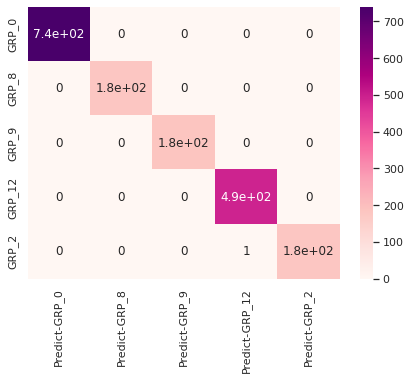

In [140]:
# Confusion Matrix for training set:

cm = confusion_matrix(yg_train, y_train_predg)
df_cm = pd.DataFrame(cm, index = [i for i in ["GRP_0", "GRP_8", "GRP_9", "GRP_12", "GRP_2"]],
                  columns = [i for i in ["Predict-GRP_0","Predict-GRP_8","Predict-GRP_9","Predict-GRP_12","Predict-GRP_2"]])
plt.figure(figsize = (7,5))
color_bar = sns.color_palette("RdPu", as_cmap=True)
sns.heatmap(df_cm, annot=True, cmap=color_bar)

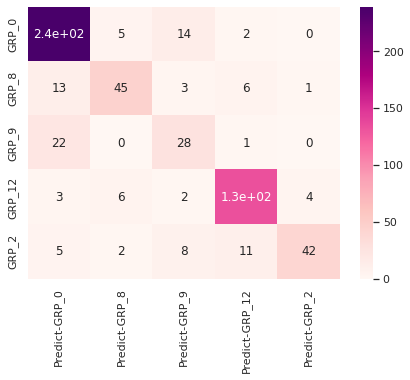

In [141]:
# Confusion Matrix for Test set:

cm = confusion_matrix(yg_test, y_test_predg)
df_cm = pd.DataFrame(cm, index = [i for i in ["GRP_0", "GRP_8", "GRP_9", "GRP_12", "GRP_2"]],
                  columns = [i for i in ["Predict-GRP_0","Predict-GRP_8","Predict-GRP_9","Predict-GRP_12","Predict-GRP_2"]])
plt.figure(figsize = (7,5))
color_bar = sns.color_palette("RdPu", as_cmap=True)
sns.heatmap(df_cm, annot=True, cmap=color_bar)

## Models Analysis:


In [142]:
# Evaluating the models:

loss1, accuracy1 = model.evaluate(X_test_seq, y_test, verbose=2)
print('Model 1 - Basic LSTM Model: Validation set: Validation set -> Loss : %.2f  Accuracy: %.2f' % (loss1, accuracy1*100))

loss1, accuracy1 = model2.evaluate(X_test_seq, y_test, verbose=2)
print('Model 2 - LSTM model with more layers: Validation set -> Loss : %.2f  Accuracy: %.2f' % (loss1, accuracy1*100))

loss1, accuracy1 = model_bilstm.evaluate(X_test_seq, y_test, verbose=2)
print('Model 3 - Bidirectional LSTM with Relu Activation (GloVe Embedding(200d)): Validation set -> Loss : %.2f  Accuracy: %.2f' % (loss1, accuracy1*100))

loss1, accuracy1 = model_bilstm22.evaluate(X_test_seq, y_test, verbose=2)
print('Model 4 - Bidirectional LSTM with Tanh Activation (GloVe Embedding(200d)): Validation set -> Loss : %.2f  Accuracy: %.2f' % (loss1, accuracy1*100))

loss1, accuracy1 = model_bilstm11.evaluate(X_test_seq2, y_test, verbose=2)
print('Model 5 - Bidirectional LSTM with ReLu Activation (GloVe Embedding(300d)): Validation set -> Loss : %.2f  Accuracy: %.2f' % (loss1, accuracy1*100))

loss1, accuracy1 = model_bilstm21.evaluate(X_test_seq2, y_test, verbose=2)
print('Model 6 - Bidirectional LSTM with Tanh Activation (GloVe Embedding(300d)): Validation set -> Loss : %.2f  Accuracy: %.2f' % (loss1, accuracy1*100))

loss1, accuracy1 = model_wv.evaluate(X_test_seq1, y_test, verbose=2)
print('Model 7 - Bidirectional LSTM with ReLu Activation (Word2Vec): Validation set -> Loss : %.2f  Accuracy: %.2f' % (loss1, accuracy1*100))

loss1, accuracy1 = model_wv2.evaluate(X_test_seq1, y_test, verbose=2)
print('Model 8 - Bidirectional LSTM with Tanh Activation (Word2Vec): Validation set -> Loss : %.2f  Accuracy: %.2f' % (loss1, accuracy1*100))

loss1, accuracy1 = model_bilstm_g.evaluate(Xg_test_seq, yg_test, verbose=2)
print('Model 9 - For Top 5 Groups data & Bidirectional LSTM with Tanh Activation (GloVe Embedding(200d)): Validation set -> Loss : %.2f  Accuracy: %.2f' % (loss1, accuracy1*100))

59/59 - 4s - loss: 2.6693 - accuracy: 0.4266 - 4s/epoch - 63ms/step
Model 1 - Basic LSTM Model: Validation set: Validation set -> Loss : 2.67  Accuracy: 42.66
59/59 - 7s - loss: nan - accuracy: 0.4266 - 7s/epoch - 125ms/step
Model 2 - LSTM model with more layers: Validation set -> Loss : nan  Accuracy: 42.66
59/59 - 1s - loss: 1.9295 - accuracy: 0.6234 - 633ms/epoch - 11ms/step
Model 3 - Bidirectional LSTM with Relu Activation (GloVe Embedding(200d)): Validation set -> Loss : 1.93  Accuracy: 62.34
59/59 - 1s - loss: 2.4320 - accuracy: 0.6261 - 627ms/epoch - 11ms/step
Model 4 - Bidirectional LSTM with Tanh Activation (GloVe Embedding(200d)): Validation set -> Loss : 2.43  Accuracy: 62.61
59/59 - 1s - loss: 2.3125 - accuracy: 0.6293 - 899ms/epoch - 15ms/step
Model 5 - Bidirectional LSTM with ReLu Activation (GloVe Embedding(300d)): Validation set -> Loss : 2.31  Accuracy: 62.93
59/59 - 1s - loss: 2.5088 - accuracy: 0.6154 - 885ms/epoch - 15ms/step
Model 6 - Bidirectional LSTM with Tanh A

**Observations:**

-  As per accuracy, Bidirectional LSTM with Tanh Activation (GloVe Embedding(200d)) is best model for all groups data(Original data). It is giving 62%+ accuracy.

-  As per accuracy, Top 5 Groups data & Bidirectional LSTM with Tanh Activation (GloVe Embedding(200d)). It is giving 81% + accuracy.

## Best Models:

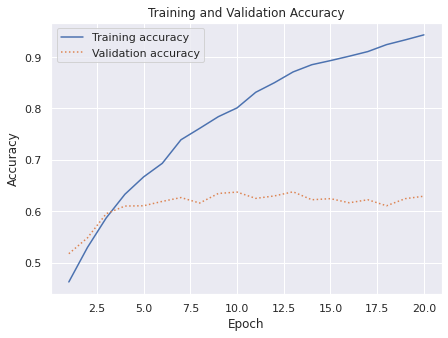

In [143]:
# All groups data -> Display Training and validation accuracy graph:

acc = hist_bilstm11.history['accuracy']
val = hist_bilstm11.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

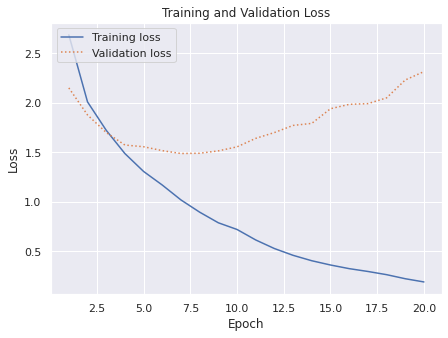

In [144]:
# All groups data -> Display training and validation loss graph:

loss = hist_bilstm11.history['loss']
val = hist_bilstm11.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val, ':', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

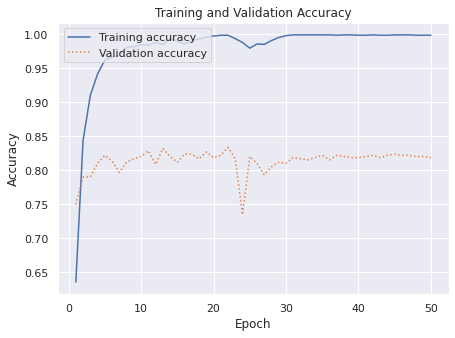

In [145]:
# Top 5 groups data -> Display Training and validation accuracy graph:

acc = hist_bilstm_g.history['accuracy']
val = hist_bilstm_g.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

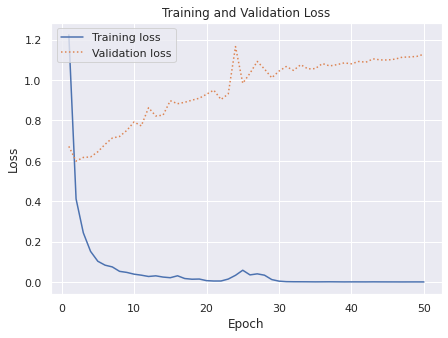

In [146]:
# Top 5 groups data -> Display training and validation loss graph:

loss = hist_bilstm_g.history['loss']
val = hist_bilstm_g.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val, ':', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

In [147]:
# All groups data -> Classification Report for test set:

y_test_pred1 = model_bilstm22.predict(X_test_seq)
y_test_pred1 = np.array([np.argmax(pred) for pred in y_test_pred1])

print('Classification Report:\n',classification_report(y_test, y_test_pred1))

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       802
           1       0.60      0.50      0.55         6
           2       0.66      0.53      0.58        36
           3       0.00      0.00      0.00         9
           4       0.54      0.56      0.55        55
           5       0.59      0.51      0.55        43
           6       0.42      0.38      0.40        26
           7       0.11      0.20      0.14         5
           8       0.22      0.24      0.23        17
           9       0.95      1.00      0.97        18
          10       0.31      0.35      0.33        23
          11       0.34      0.41      0.37        54
          12       0.49      0.39      0.43        62
          13       0.00      0.00      0.00        12
          14       0.40      0.22      0.29         9
          15       0.14      0.14      0.14         7
          16       0.20      0.17      0.18         6
   

In [148]:
# Top 5 group data -> Classification Report for test set:

y_test_predg = model_bilstm_g.predict(Xg_test_seq)
y_test_predg = np.array([np.argmax(pred) for pred in y_test_predg])

print('Classification Report for test set:\n',classification_report(yg_test, y_test_predg))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       260
           1       0.78      0.66      0.71        68
           2       0.51      0.55      0.53        51
           3       0.87      0.90      0.88       148
           4       0.89      0.62      0.73        68

    accuracy                           0.82       595
   macro avg       0.78      0.73      0.75       595
weighted avg       0.82      0.82      0.82       595



In [149]:
# Save the best model:

pickle.dump(model_bilstm22, open("best_model.pkl", "wb"))

In [150]:
# Save the best model for Top 5 group data:

pickle.dump(model_bilstm_g, open("best_model_top5.pkl", "wb"))

----------------------------------------------------------------------------------------



In [152]:
%%shell
jupyter nbconvert --to html '/content/gdrive/MyDrive/Capstone_NLP/Capstone Project (NLP 1-Group 2) Complete.ipynb'

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/Capstone_NLP/Capstone Project (NLP 1-Group 2) Complete.ipynb to html
[NbConvertApp] Writing 2893158 bytes to /content/gdrive/MyDrive/Capstone_NLP/Capstone Project (NLP 1-Group 2) Complete.html
